In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Improve graph quality
plt.rcParams['figure.dpi'] = 200
# See all columns
pd.set_option('display.max_columns', None)

In [2]:
# Load the data
df = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones/ResultadosElectorales_2023.csv')

C:\Users\Marcos\AppData\Local\Temp\ipykernel_8756\553406056.py:2: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones/ResultadosElectorales_2023.csv')


## Dataset Information


<hr>

In [21]:
df.head()

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,circuito_nombre,mesa_id,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,00018,474,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,00018,474,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,00018,474,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,00018,474,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,00018,475,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95


In [5]:
df.columns.tolist()

['año',
 'eleccion_tipo',
 'recuento_tipo',
 'padron_tipo',
 'distrito_id',
 'distrito_nombre',
 'seccionprovincial_id',
 'seccionprovincial_nombre',
 'seccion_id',
 'seccion_nombre',
 'circuito_id',
 'circuito_nombre',
 'mesa_id',
 'mesa_tipo',
 'mesa_electores',
 'cargo_id',
 'cargo_nombre',
 'agrupacion_id',
 'agrupacion_nombre',
 'lista_numero',
 'lista_nombre',
 'votos_tipo',
 'votos_cantidad']

In [6]:
df.shape

(5868102, 23)

In [10]:
df.isna().sum()

año                               0
eleccion_tipo                     0
recuento_tipo                     0
padron_tipo                       0
distrito_id                       0
distrito_nombre                   0
seccionprovincial_id              0
seccionprovincial_nombre    2664331
seccion_id                        0
seccion_nombre                    0
circuito_id                       0
circuito_nombre                   0
mesa_id                           0
mesa_tipo                         0
mesa_electores                    0
cargo_id                          0
cargo_nombre                      0
agrupacion_id                     0
agrupacion_nombre           3104670
lista_numero                2710180
lista_nombre                5814850
votos_tipo                        0
votos_cantidad                    0
dtype: int64

- We can see that although seccionprovincial_nombre has 2664331 NA values, we have seccionprovincial_id which has 0 NA values, so we can use 
 that instead of seccionprovincial_nombre. Nonetheless, during the data exploration and analysis I will not be using neither variables.
- Then with agrupacion_nombre, by looking at the dataframe we can see that whenever votos_tipo is "BLANCO", "NULO", "COMANDO", "IMPUGNADO" or "RECURRIDO", agrupacion_nombre is NA, so those NA values are not to worry about in the future.
- When it comes to lista_nombre and lista_numero, those are things that I do not care about given that I am only going to analyze the presidential election results.
Taking these things into consideration, let's depurate the data and only keep the variables that interest us.

In [3]:
df_presidente = df[df['cargo_nombre'] == 'PRESIDENTE Y VICE']

Given that each "mesa" is identified by certain values (distrito_nombre/distrito_id +  seccion_nombre/seccion_id + circuito_id + mesa_id). For the sake of consistency, let's only use id variables.

In [5]:
df_presidente['id_mesa'] = df_presidente['distrito_id'].astype(str)+'-'+df_presidente['seccion_id'].astype(str)+'-'+df_presidente['circuito_id'].astype(str)+'-'+df_presidente['mesa_id'].astype(str)
# In the oficial webpage of the government it says that the total number of "mesas" were 104520, so let's check we have the same number
len(df_presidente['id_mesa'].unique())

C:\Users\Marcos\AppData\Local\Temp\ipykernel_8756\1009349227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_presidente['id_mesa'] = df_presidente['distrito_id'].astype(str)+'-'+df_presidente['seccion_id'].astype(str)+'-'+df_presidente['circuito_id'].astype(str)+'-'+df_presidente['mesa_id'].astype(str)


104520

In [6]:
df_presidente_dep = df_presidente.drop(['año',
                          'eleccion_tipo',
                          'recuento_tipo',
                          'padron_tipo',
                          'seccionprovincial_nombre',
                          'seccion_nombre',
                          'mesa_tipo',
                          'circuito_nombre',
                          'seccionprovincial_id',
                          'circuito_id',
                          'mesa_id',
                          'seccion_id',
                          'cargo_id',
                          'lista_numero',
                          'lista_nombre',
                          'cargo_nombre',
                          'distrito_id',
                          ],
                         axis = 1)
df_presidente_dep = df_presidente_dep[['distrito_nombre','id_mesa','mesa_electores','agrupacion_nombre','agrupacion_id','votos_tipo','votos_cantidad']]
df_presidente_dep = df_presidente_dep.sort_values(['distrito_nombre','id_mesa']).reset_index(drop=True)
df_presidente_dep.head()

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad
0,Buenos Aires,2-1-00001-1,350,JUNTOS POR EL CAMBIO,132,POSITIVO,91
1,Buenos Aires,2-1-00001-1,350,LA LIBERTAD AVANZA,135,POSITIVO,80
2,Buenos Aires,2-1-00001-1,350,UNION POR LA PATRIA,134,POSITIVO,67
3,Buenos Aires,2-1-00001-1,350,HACEMOS POR NUESTRO PAIS,133,POSITIVO,18
4,Buenos Aires,2-1-00001-1,350,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,136,POSITIVO,8


In [7]:
# Let's reduce the name length of one of the "agrupaciones"
df_presidente_dep['agrupacion_nombre'] = df_presidente_dep['agrupacion_nombre'].replace(['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], 'FRENTE DE IZQUIERDA')

## Election Results

<hr>

### How many votes did each agrupation get in this election?

In [8]:
agrupation_votes = df_presidente_dep.groupby('agrupacion_nombre')['votos_cantidad'].sum().reset_index()
agrupation_votes = agrupation_votes.sort_values('votos_cantidad', ascending=False)
# Total votes that voted an agrupation
total_votes = agrupation_votes['votos_cantidad'].sum()
agrupation_votes

,agrupacion_nombre,votos_cantidad
4,UNION POR LA PATRIA,9645983
3,LA LIBERTAD AVANZA,7884336
2,JUNTOS POR EL CAMBIO,6267152
1,HACEMOS POR NUESTRO PAIS,1784315
0,FRENTE DE IZQUIERDA,709932


### Election Results

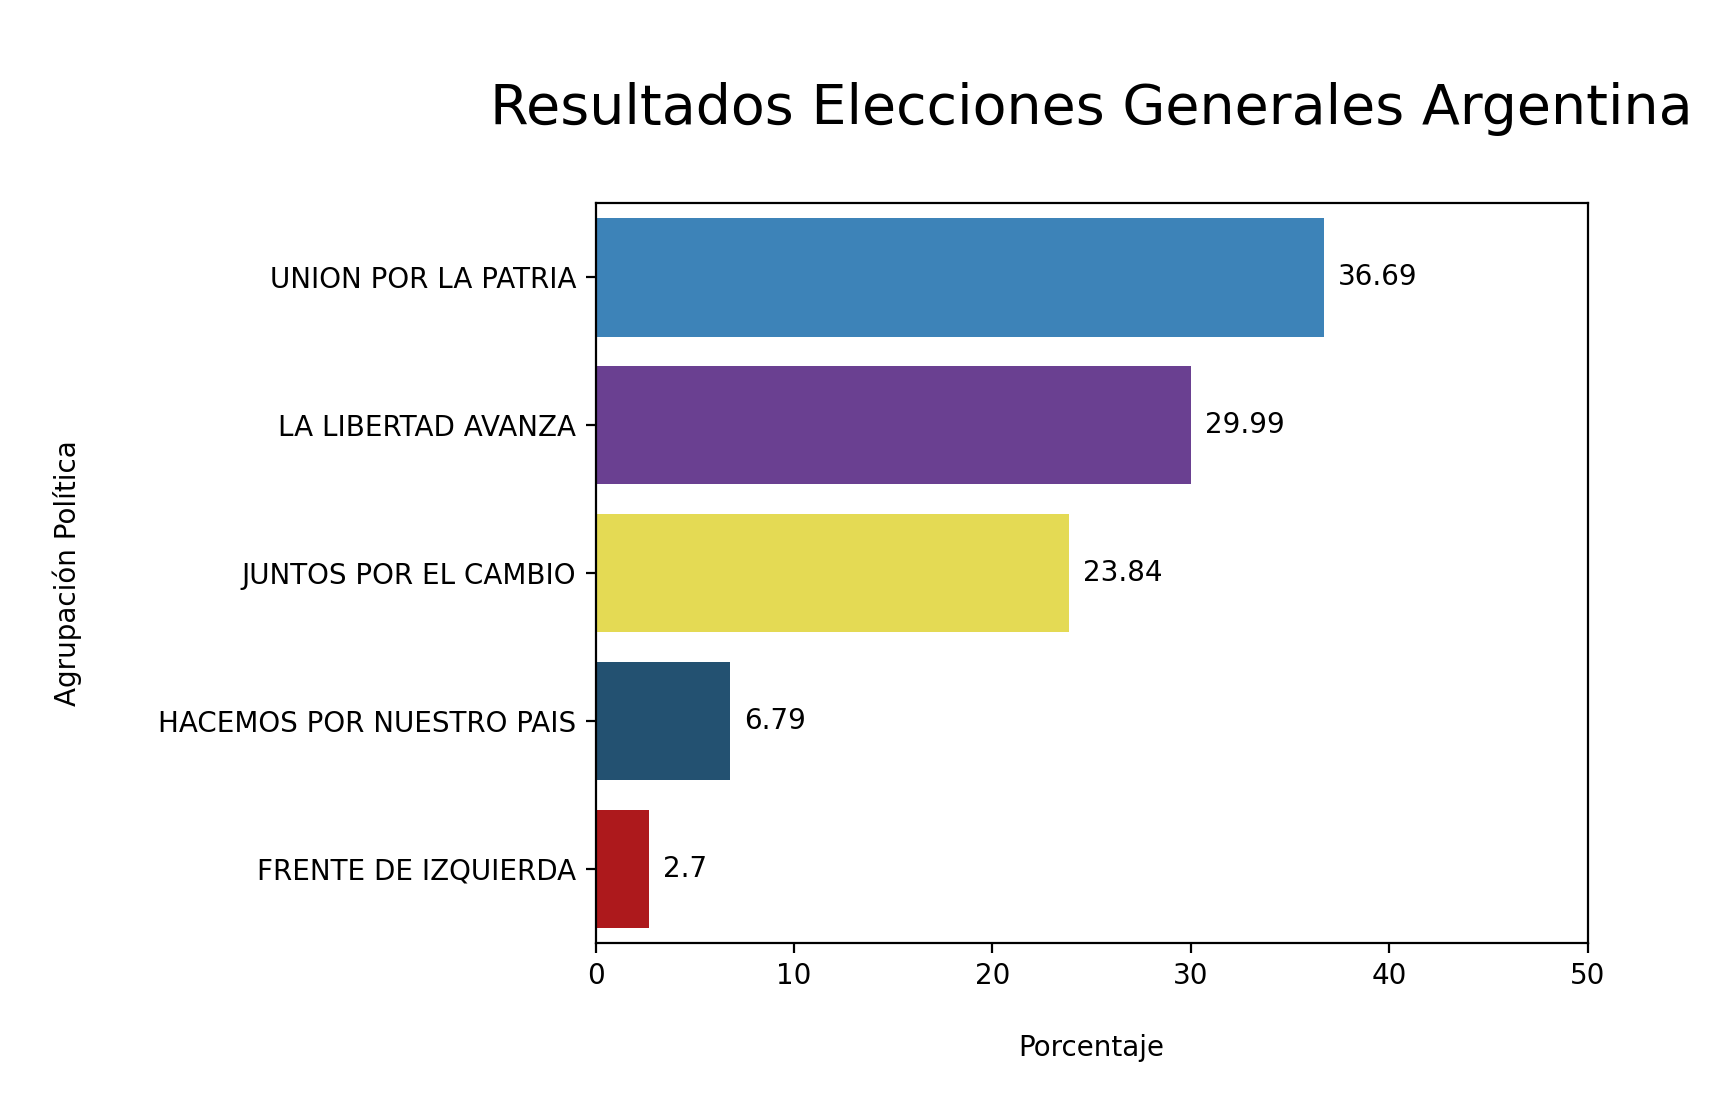

In [9]:
# Each agrupation has a specific colour
custom_palette = sns.color_palette(['#2986CC', '#6A329F', '#FCEE3C', '#16537e', '#C60004'])

results = df_presidente_dep[['agrupacion_nombre','votos_cantidad']]
results = round(results.groupby('agrupacion_nombre')['votos_cantidad'].sum().div(total_votes/100,axis=0),2)
results = results.reset_index().sort_values(['agrupacion_nombre'], ascending=False)

chart = sns.barplot(data=results, x='votos_cantidad', y='agrupacion_nombre', palette=custom_palette)
chart.bar_label(chart.containers[0], fontsize=10, padding=5)

plt.title('\nResultados Elecciones Generales Argentina\n', fontsize=20)
plt.xlabel('\nPorcentaje\n')
plt.ylabel('\nAgrupación Política\n\n')
plt.xlim(0,50)

plt.show()

### What about the number of votes each "Provincia" provided to the election

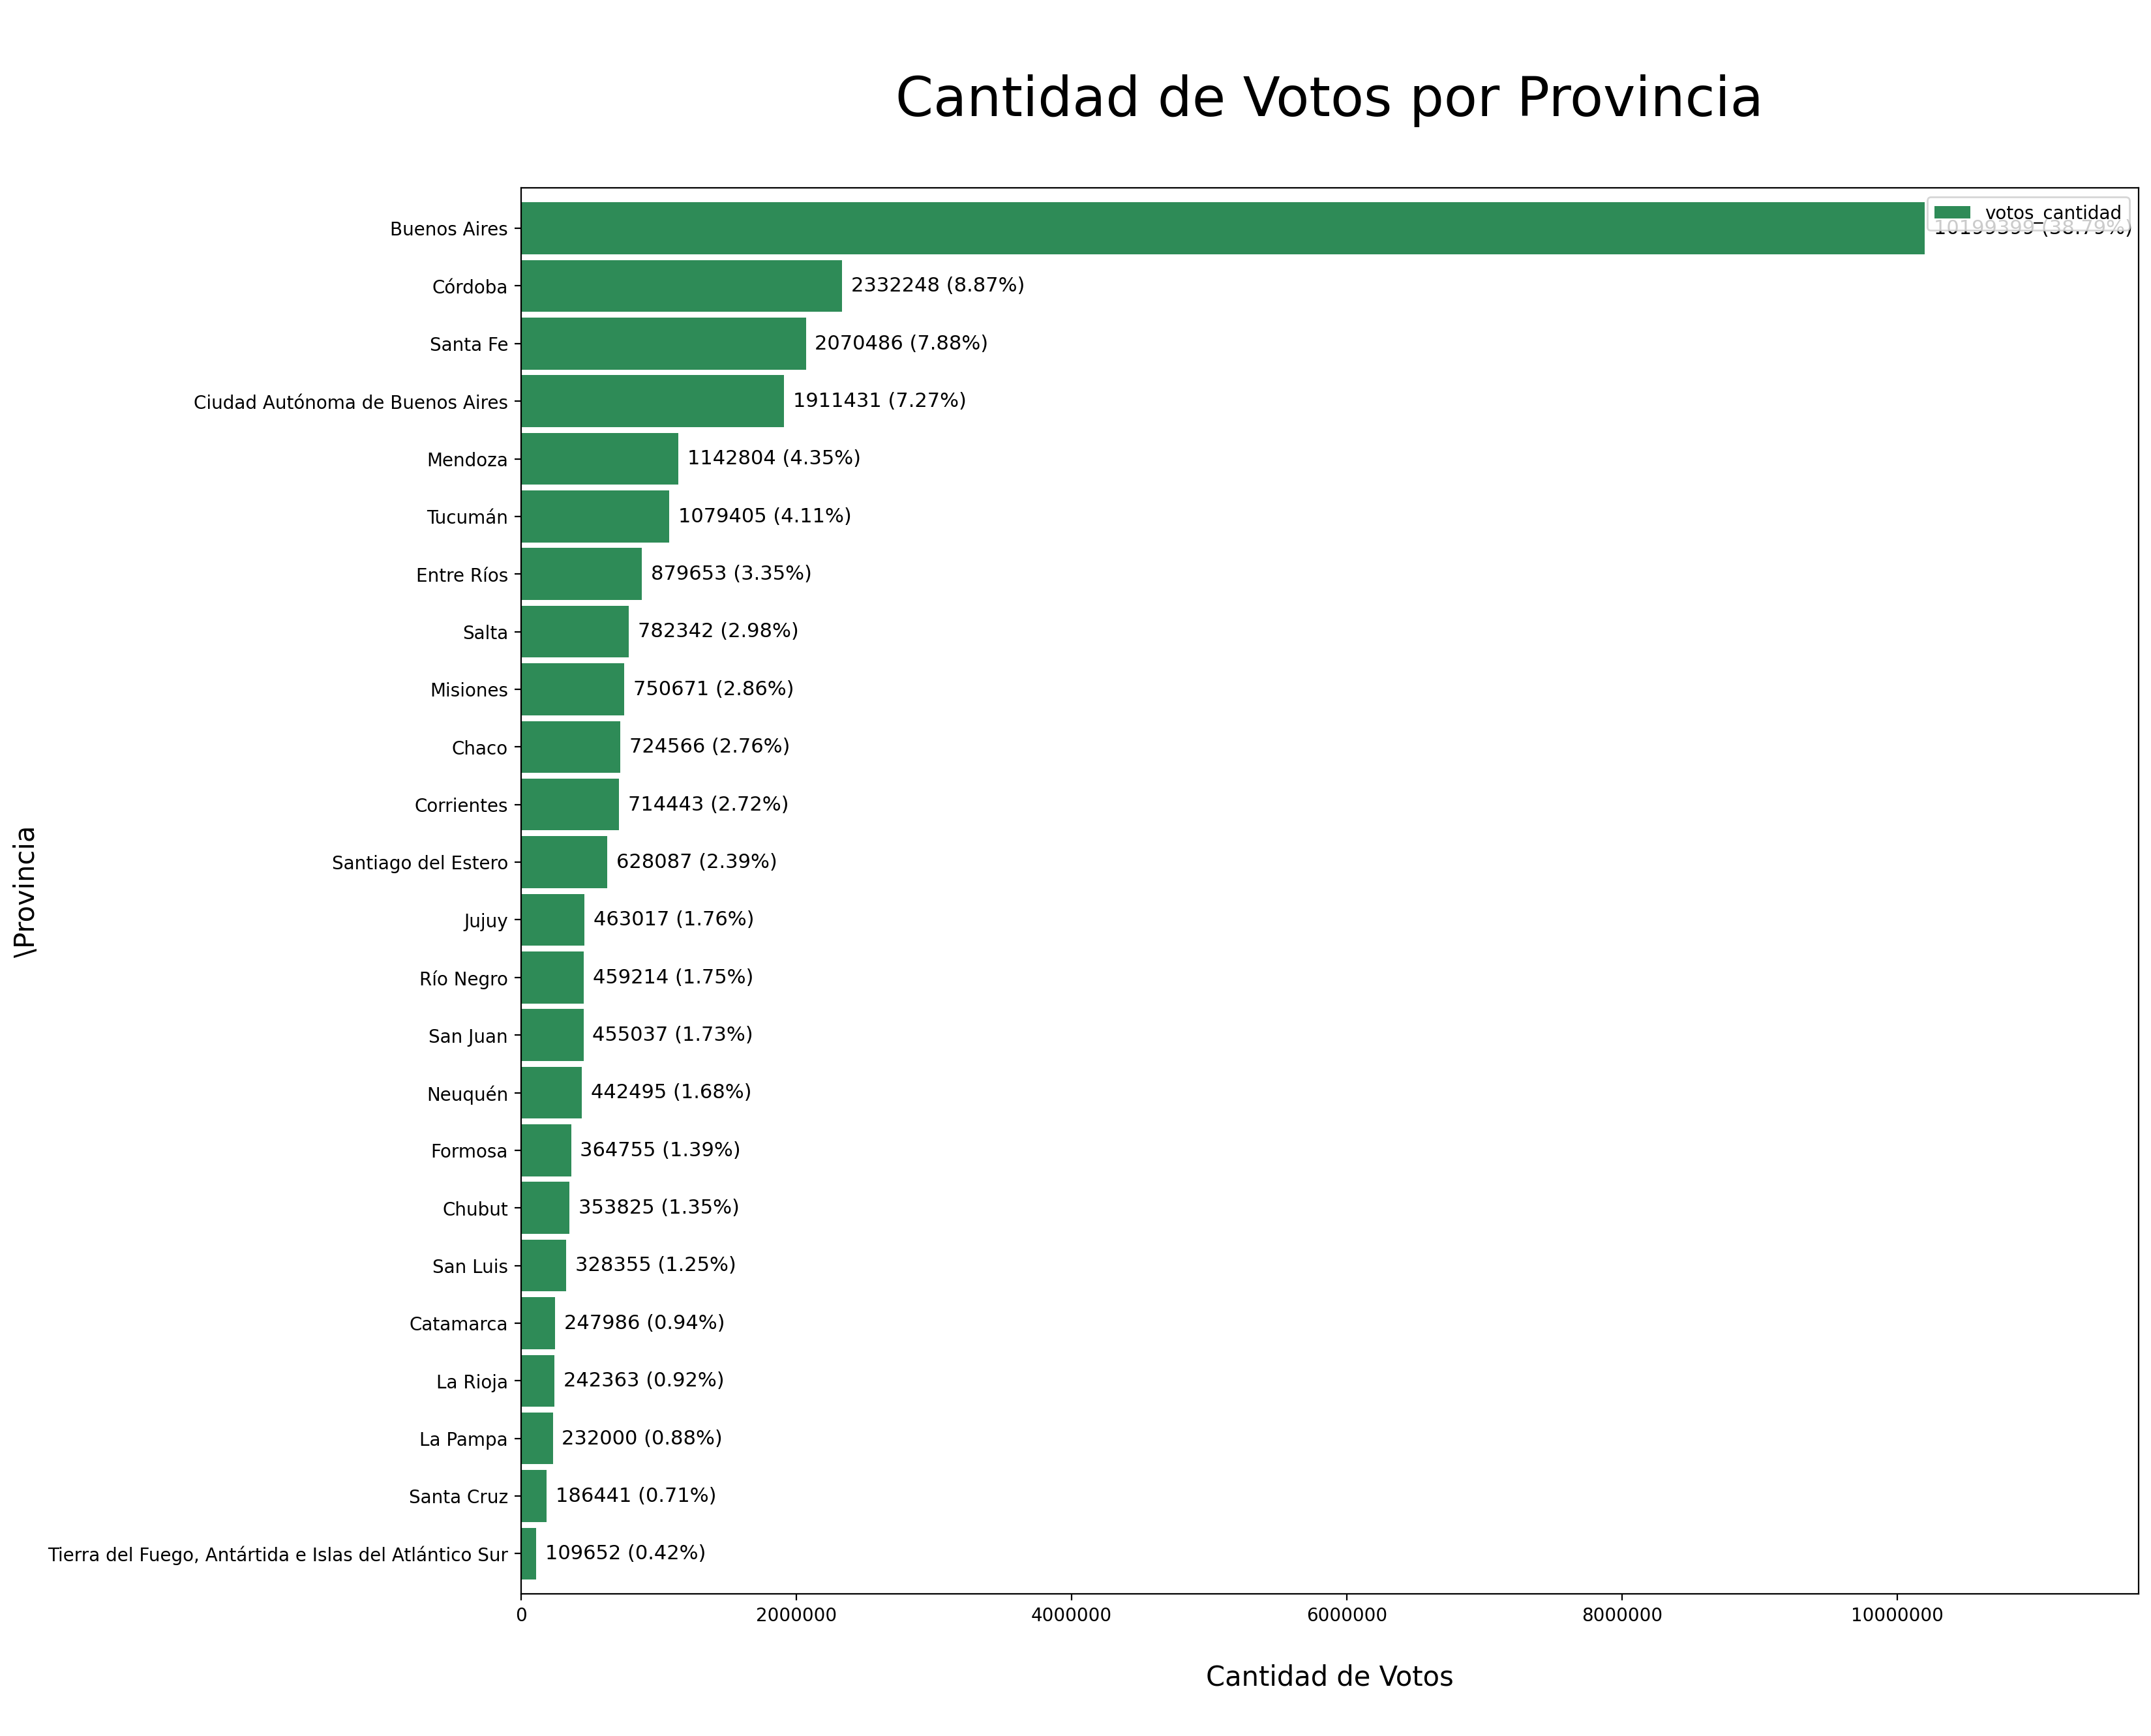

Cantidad de votos en todo el país: 27100675


In [10]:
result = df_presidente_dep.groupby('distrito_nombre')['votos_cantidad'].sum().reset_index()
result = result.set_index(['distrito_nombre'])
result = result.sort_values(['votos_cantidad'],ascending=True)

chart = result.plot(kind='barh', figsize=(16, 14), width=0.9, color='seagreen')
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{val} ({val/total_votes*100:.2f}%)' for val in container.datavalues])
    
plt.title('\nCantidad de Votos por Provincia\n', fontsize=30)
plt.xlabel('\nCantidad de Votos\n', fontsize=15)
plt.ylabel('\Provincia', fontsize=15)
plt.ticklabel_format(axis="x", style="plain")
chart.set_xlim(0, 11750000)

plt.show()

total_votes = result['votos_cantidad'].sum()
print('Cantidad de votos en todo el país:', total_votes)

### What percentage did each agrupation get in each province and also how many points did the agrupation get out of that province

In [11]:
def colores_jxc(df):
    colors = sns.color_palette("YlOrBr", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2 + 4
    custom_palette = colors[start_index:]
    return custom_palette

def colores_lla(df):
    colors = sns.color_palette("ch:s=-.2,r=.6", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2
    custom_palette = colors[start_index:]
    return custom_palette

def colores_upp(df):
    colors = sns.color_palette("Blues", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2 + 4
    custom_palette = colors[start_index:]
    return custom_palette

In [25]:
pd.options.display.float_format = '{:.2f}'.format

results = df_presidente_dep[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results = round(results.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)

votes_province = results.sum(axis=1).reset_index().sort_values(0, ascending=True)
votes_province_index = votes_province.iloc[:,0].tolist()

results = results.loc[votes_province_index]
results_index = results.reset_index().index.tolist()
for provincia in results_index:
    results.iloc[provincia,:] = round(results.iloc[provincia,:].div(results.iloc[provincia,:].sum(axis=0),axis=0),4)*100

## Agrupations Results


<hr>

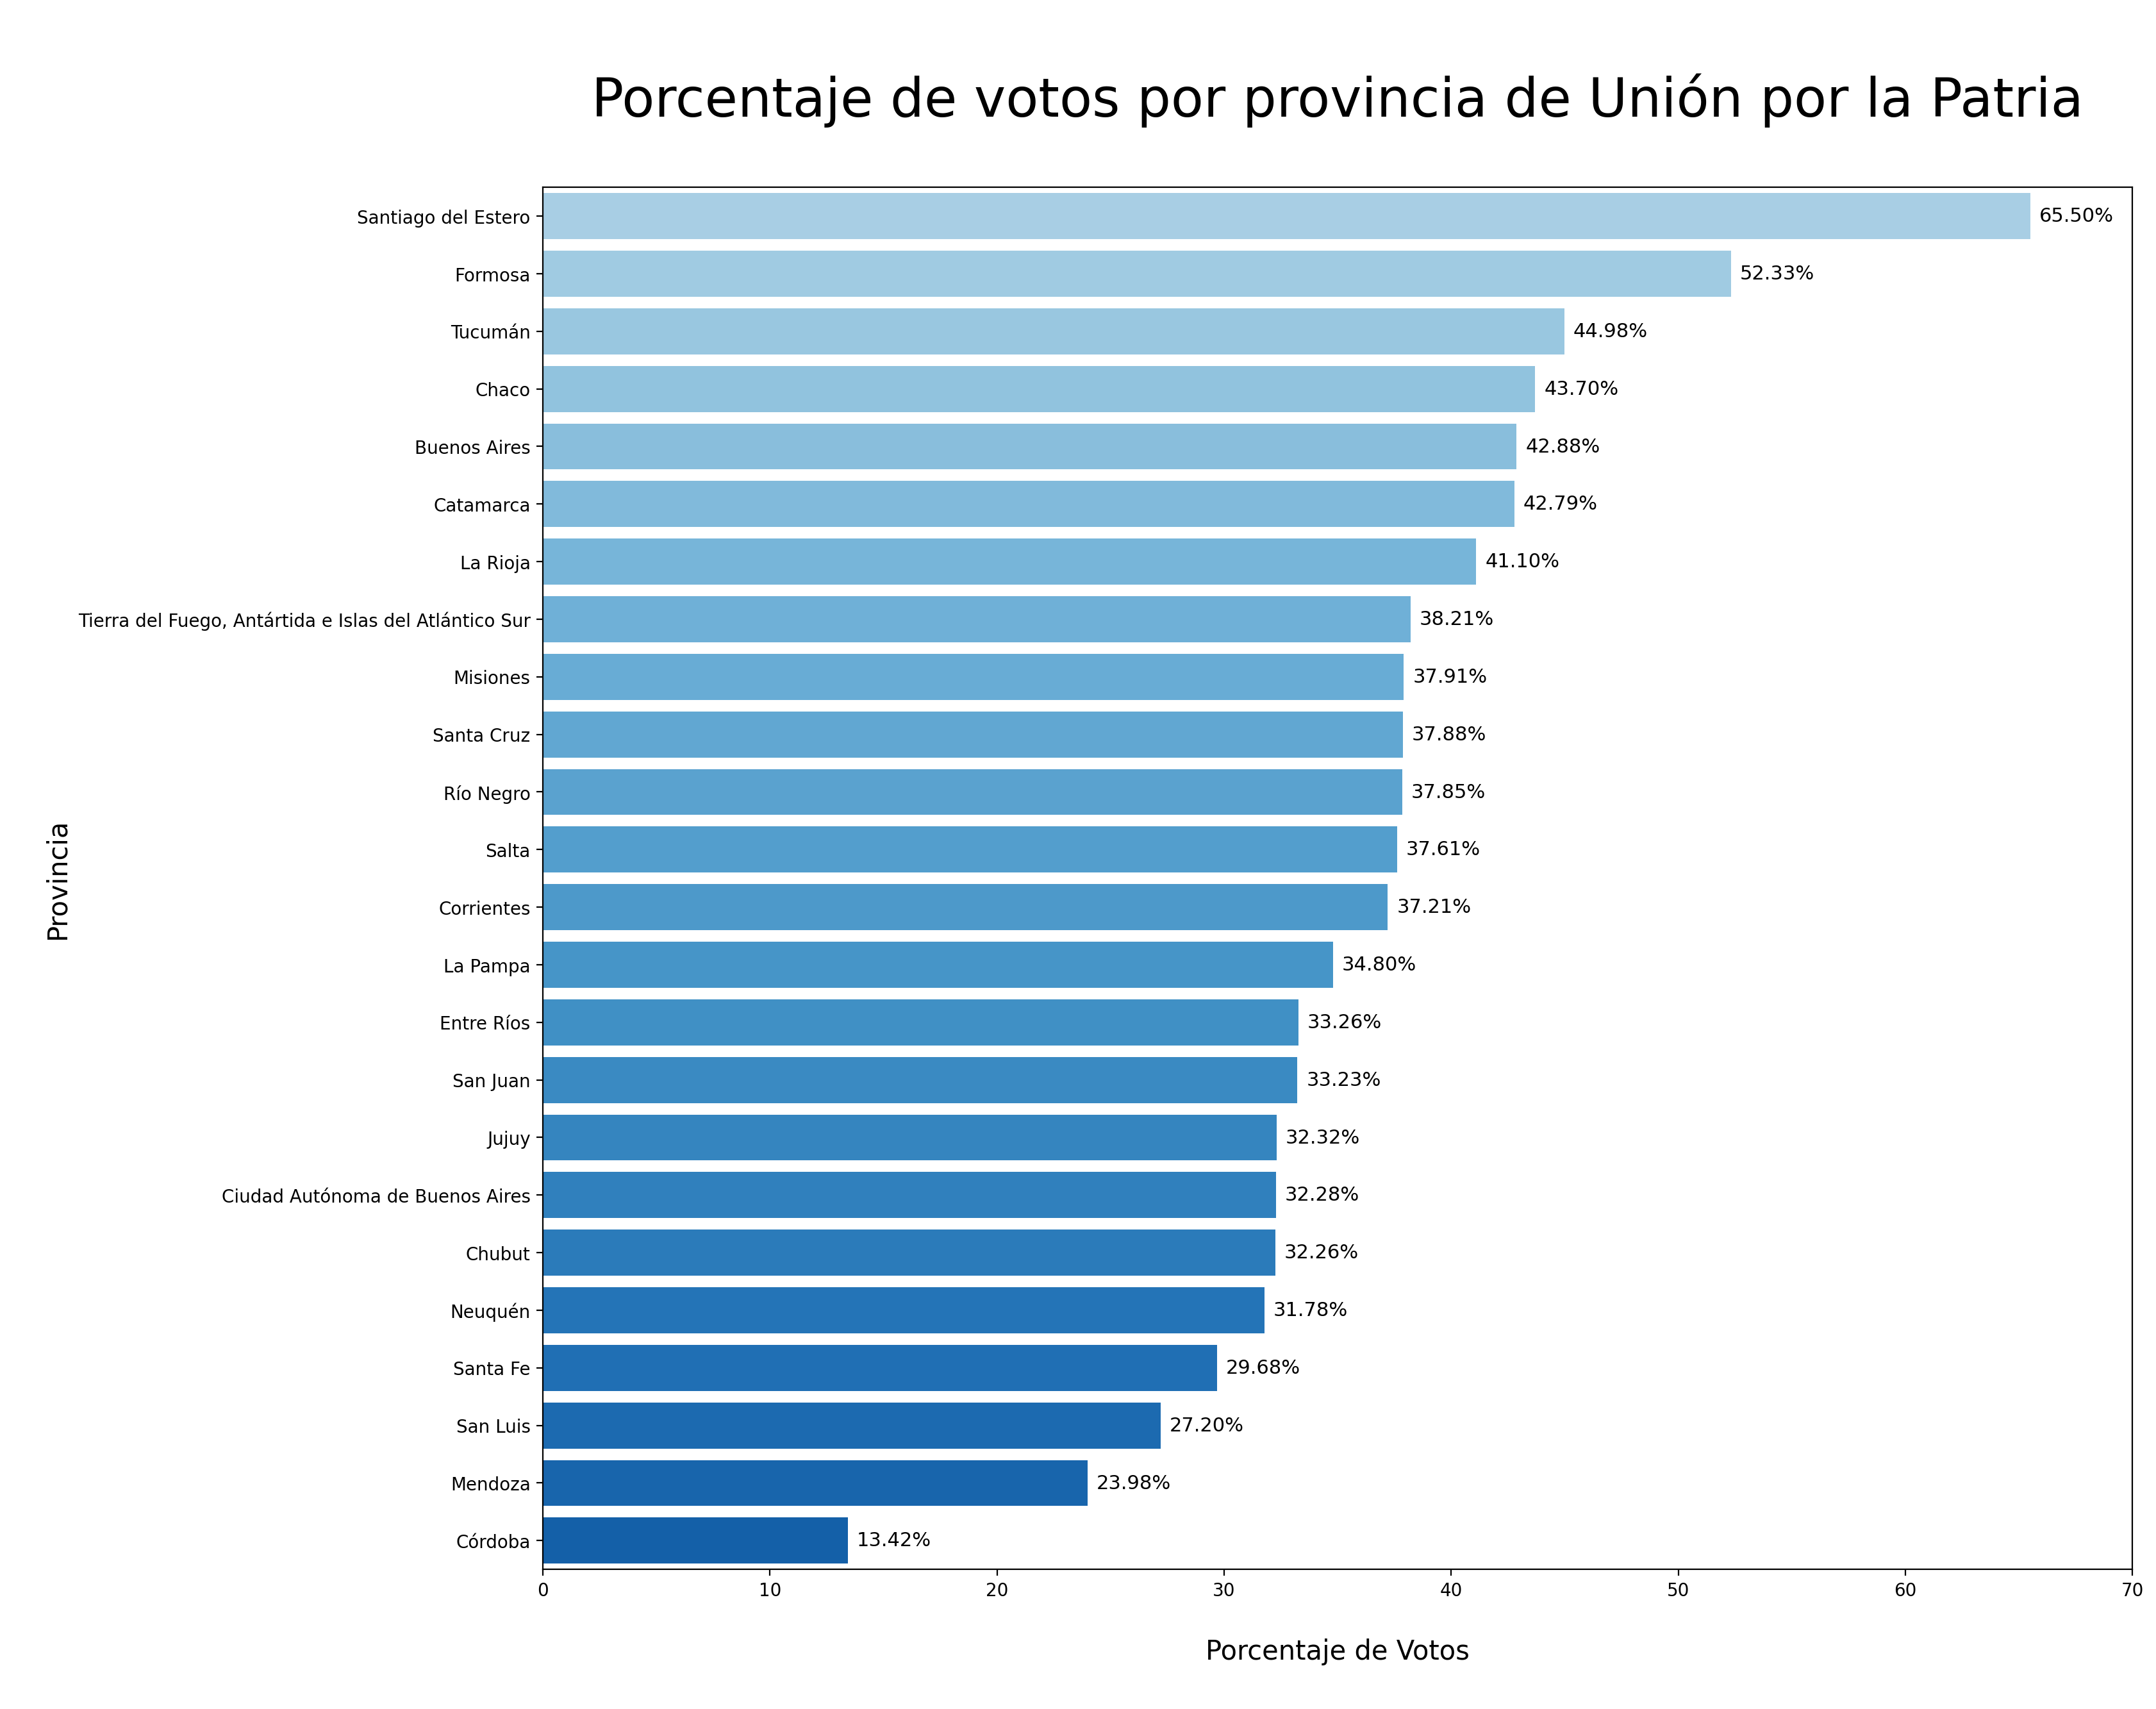

In [26]:
results_upp = results['UNION POR LA PATRIA'].reset_index().set_index('distrito_nombre').sort_values('UNION POR LA PATRIA',ascending=False)
index_upp = results_upp.index.tolist()
results_upp = results_upp.T

custom_palette = colores_upp(results_upp)
plt.figure(figsize=(16, 14))
chart = sns.barplot(data=results_upp, orient='h', palette=custom_palette, saturation=1)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\nPorcentaje de votos por provincia de Unión por la Patria\n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia', fontsize=15)
chart.set_xlim(0, 70)

plt.show()

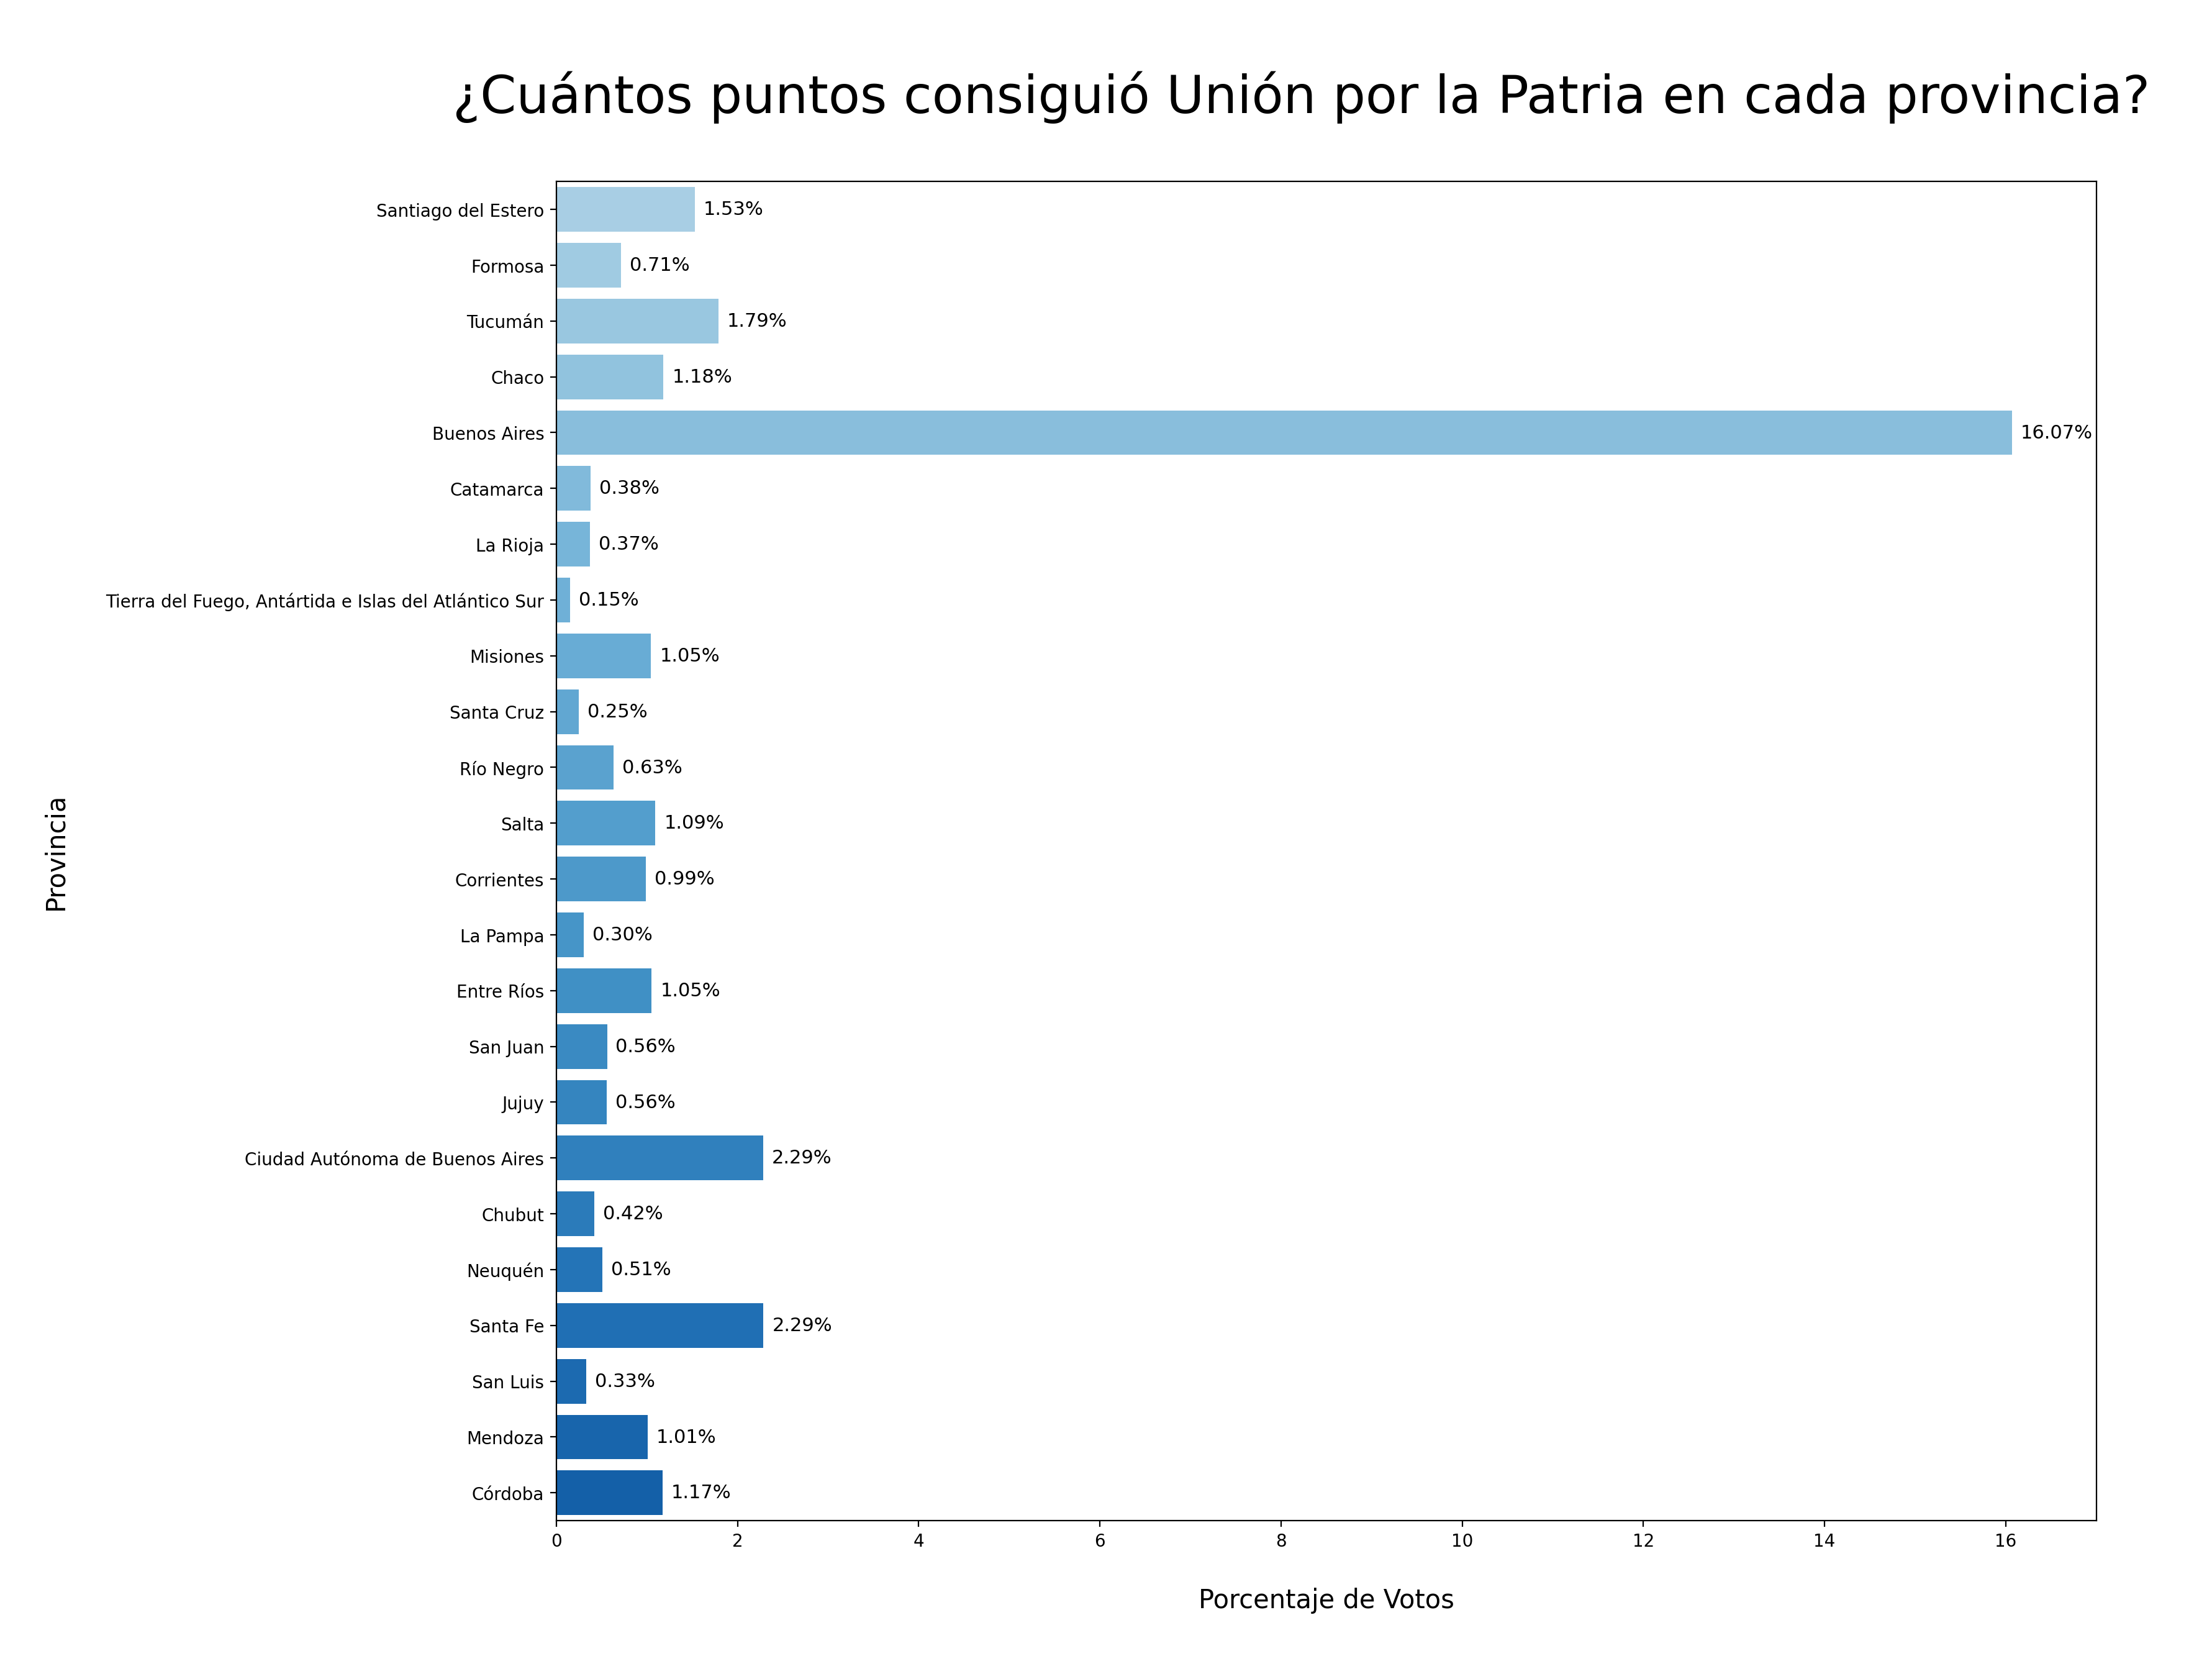

In [27]:
results_1 = df_presidente_dep[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results_1 = round(results_1.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)
results_upp = results_1['UNION POR LA PATRIA'].reset_index().set_index('distrito_nombre').sort_values('UNION POR LA PATRIA',ascending=False)
results_upp = round(results_upp.div(results_1.sum().sum())*100,3)
results_upp = results_upp.T

custom_palette = colores_upp(results_upp)
plt.figure(figsize=(16, 14))
chart = sns.barplot(data=results_upp, orient='h', palette=custom_palette, saturation=1, order = index_upp)
chart.set_xlim(0,17)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió Unión por la Patria en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)
plt.show()

### Juntos por el Cambio

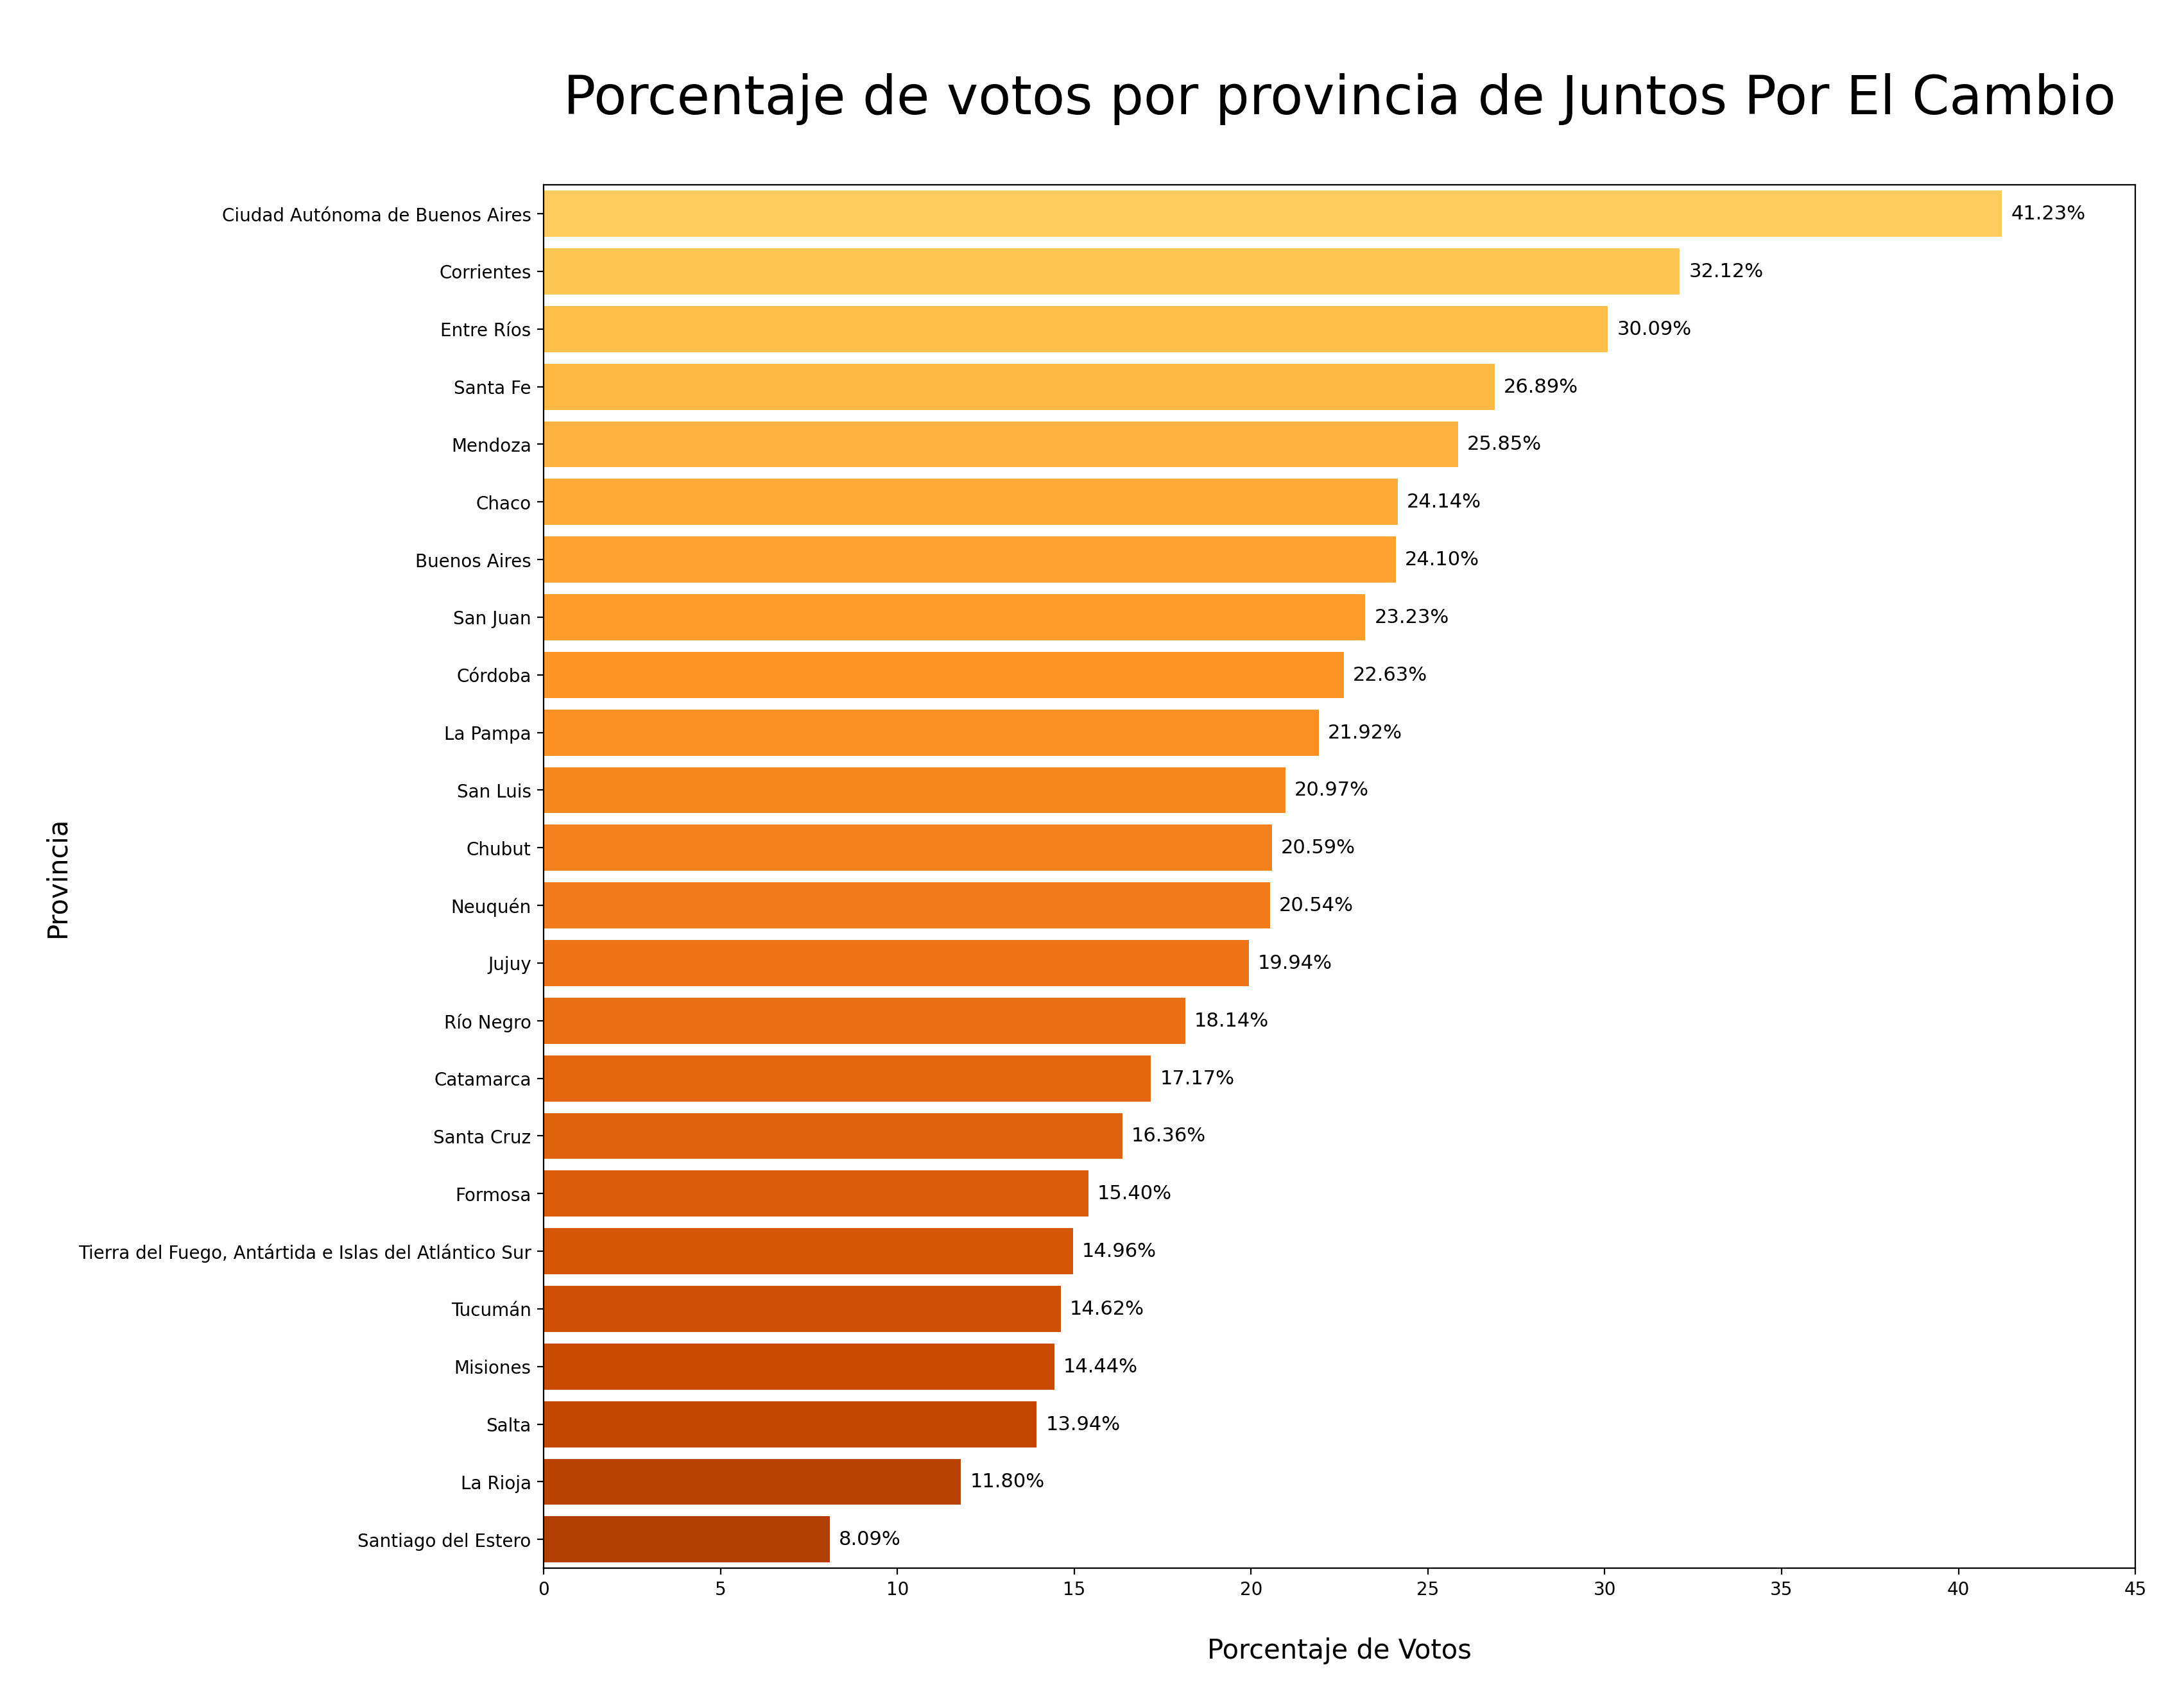

In [28]:
results_jxc = results['JUNTOS POR EL CAMBIO'].reset_index().set_index('distrito_nombre').sort_values('JUNTOS POR EL CAMBIO',ascending=False)
index_jxc = results_jxc.index.tolist()
results_jxc = results_jxc.T

custom_palette = colores_jxc(results_jxc)
plt.figure(figsize=(16, 14))
chart = sns.barplot(data=results_jxc, orient='h', palette=custom_palette, saturation=1)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\nPorcentaje de votos por provincia de Juntos Por El Cambio\n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia', fontsize=15)
chart.set_xlim(0, 45)

plt.show()

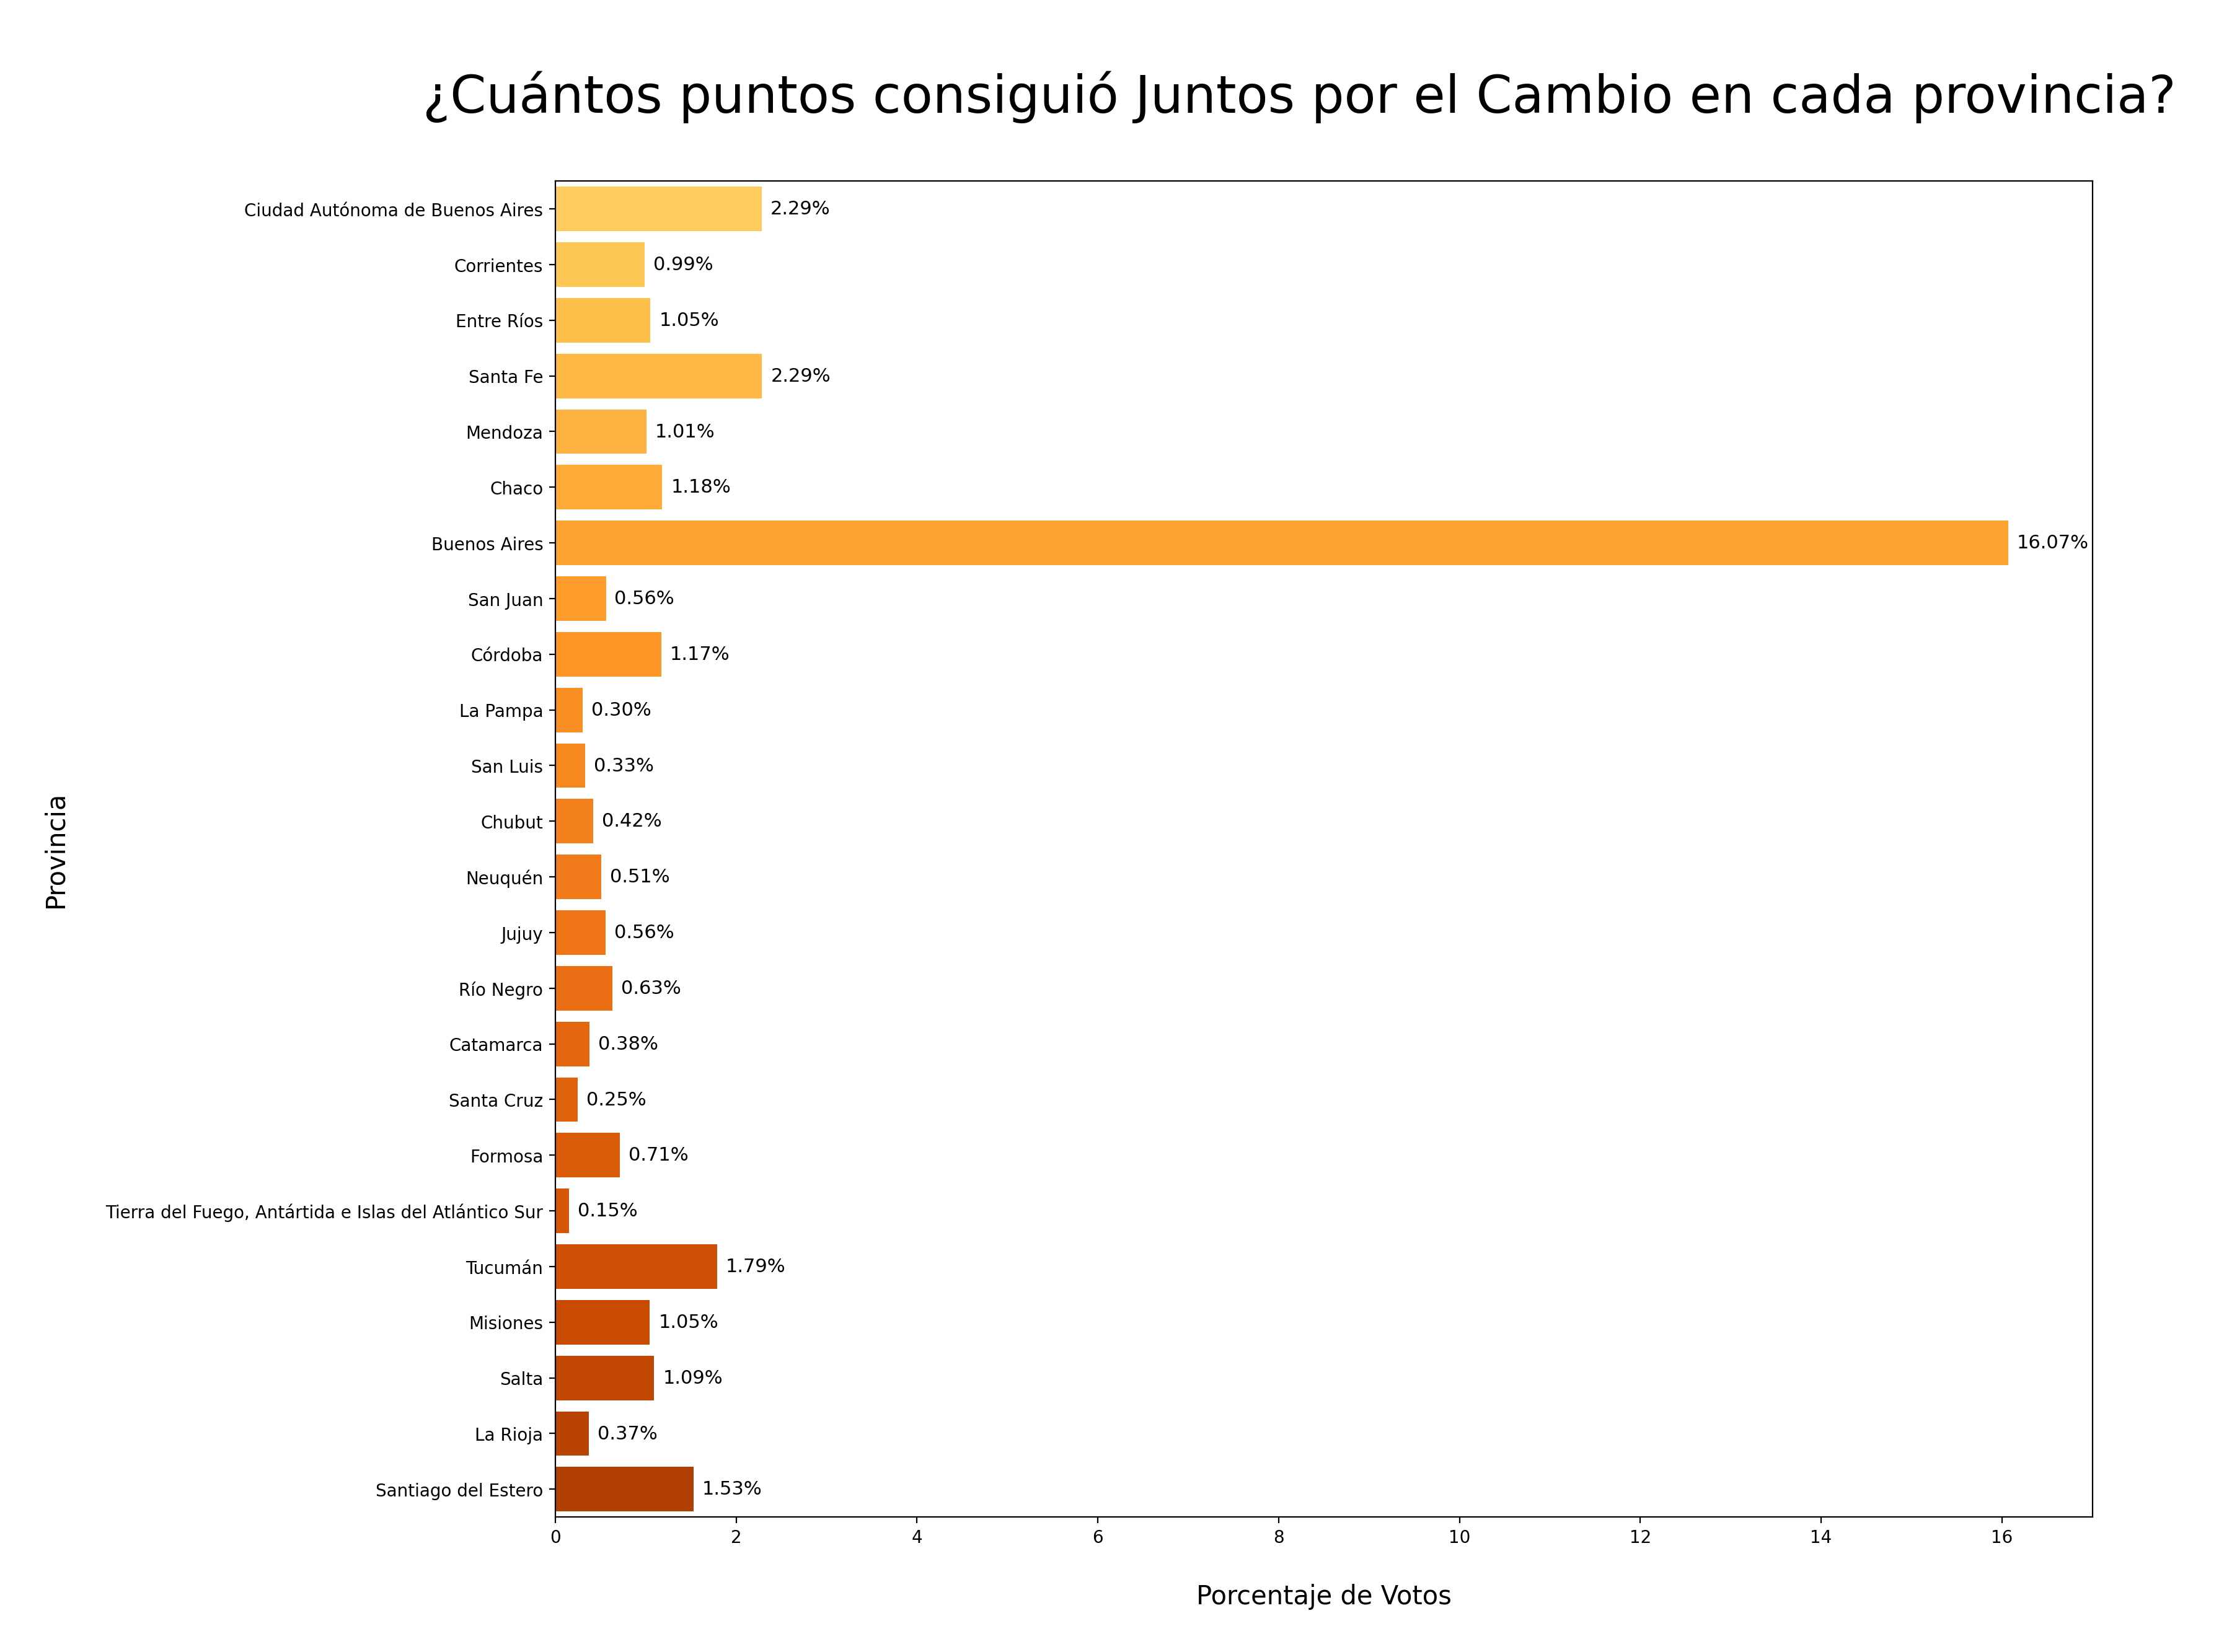

In [29]:
results_2 = df_presidente_dep[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results_2 = round(results_2.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)
results_jxc = results_2['JUNTOS POR EL CAMBIO'].reset_index().set_index('distrito_nombre').sort_values('JUNTOS POR EL CAMBIO',ascending=False)
results_jxc = round(results_jxc.div(results_2.sum().sum())*100,3)
results_jxc = results_jxc.T

custom_palette = colores_jxc(results_jxc)
plt.figure(figsize=(16, 14))
chart = sns.barplot(data=results_upp, orient='h', palette=custom_palette, saturation=1, order = index_jxc)
chart.set_xlim(0,17)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió Juntos por el Cambio en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)
plt.show()

### La Libertad Avanza

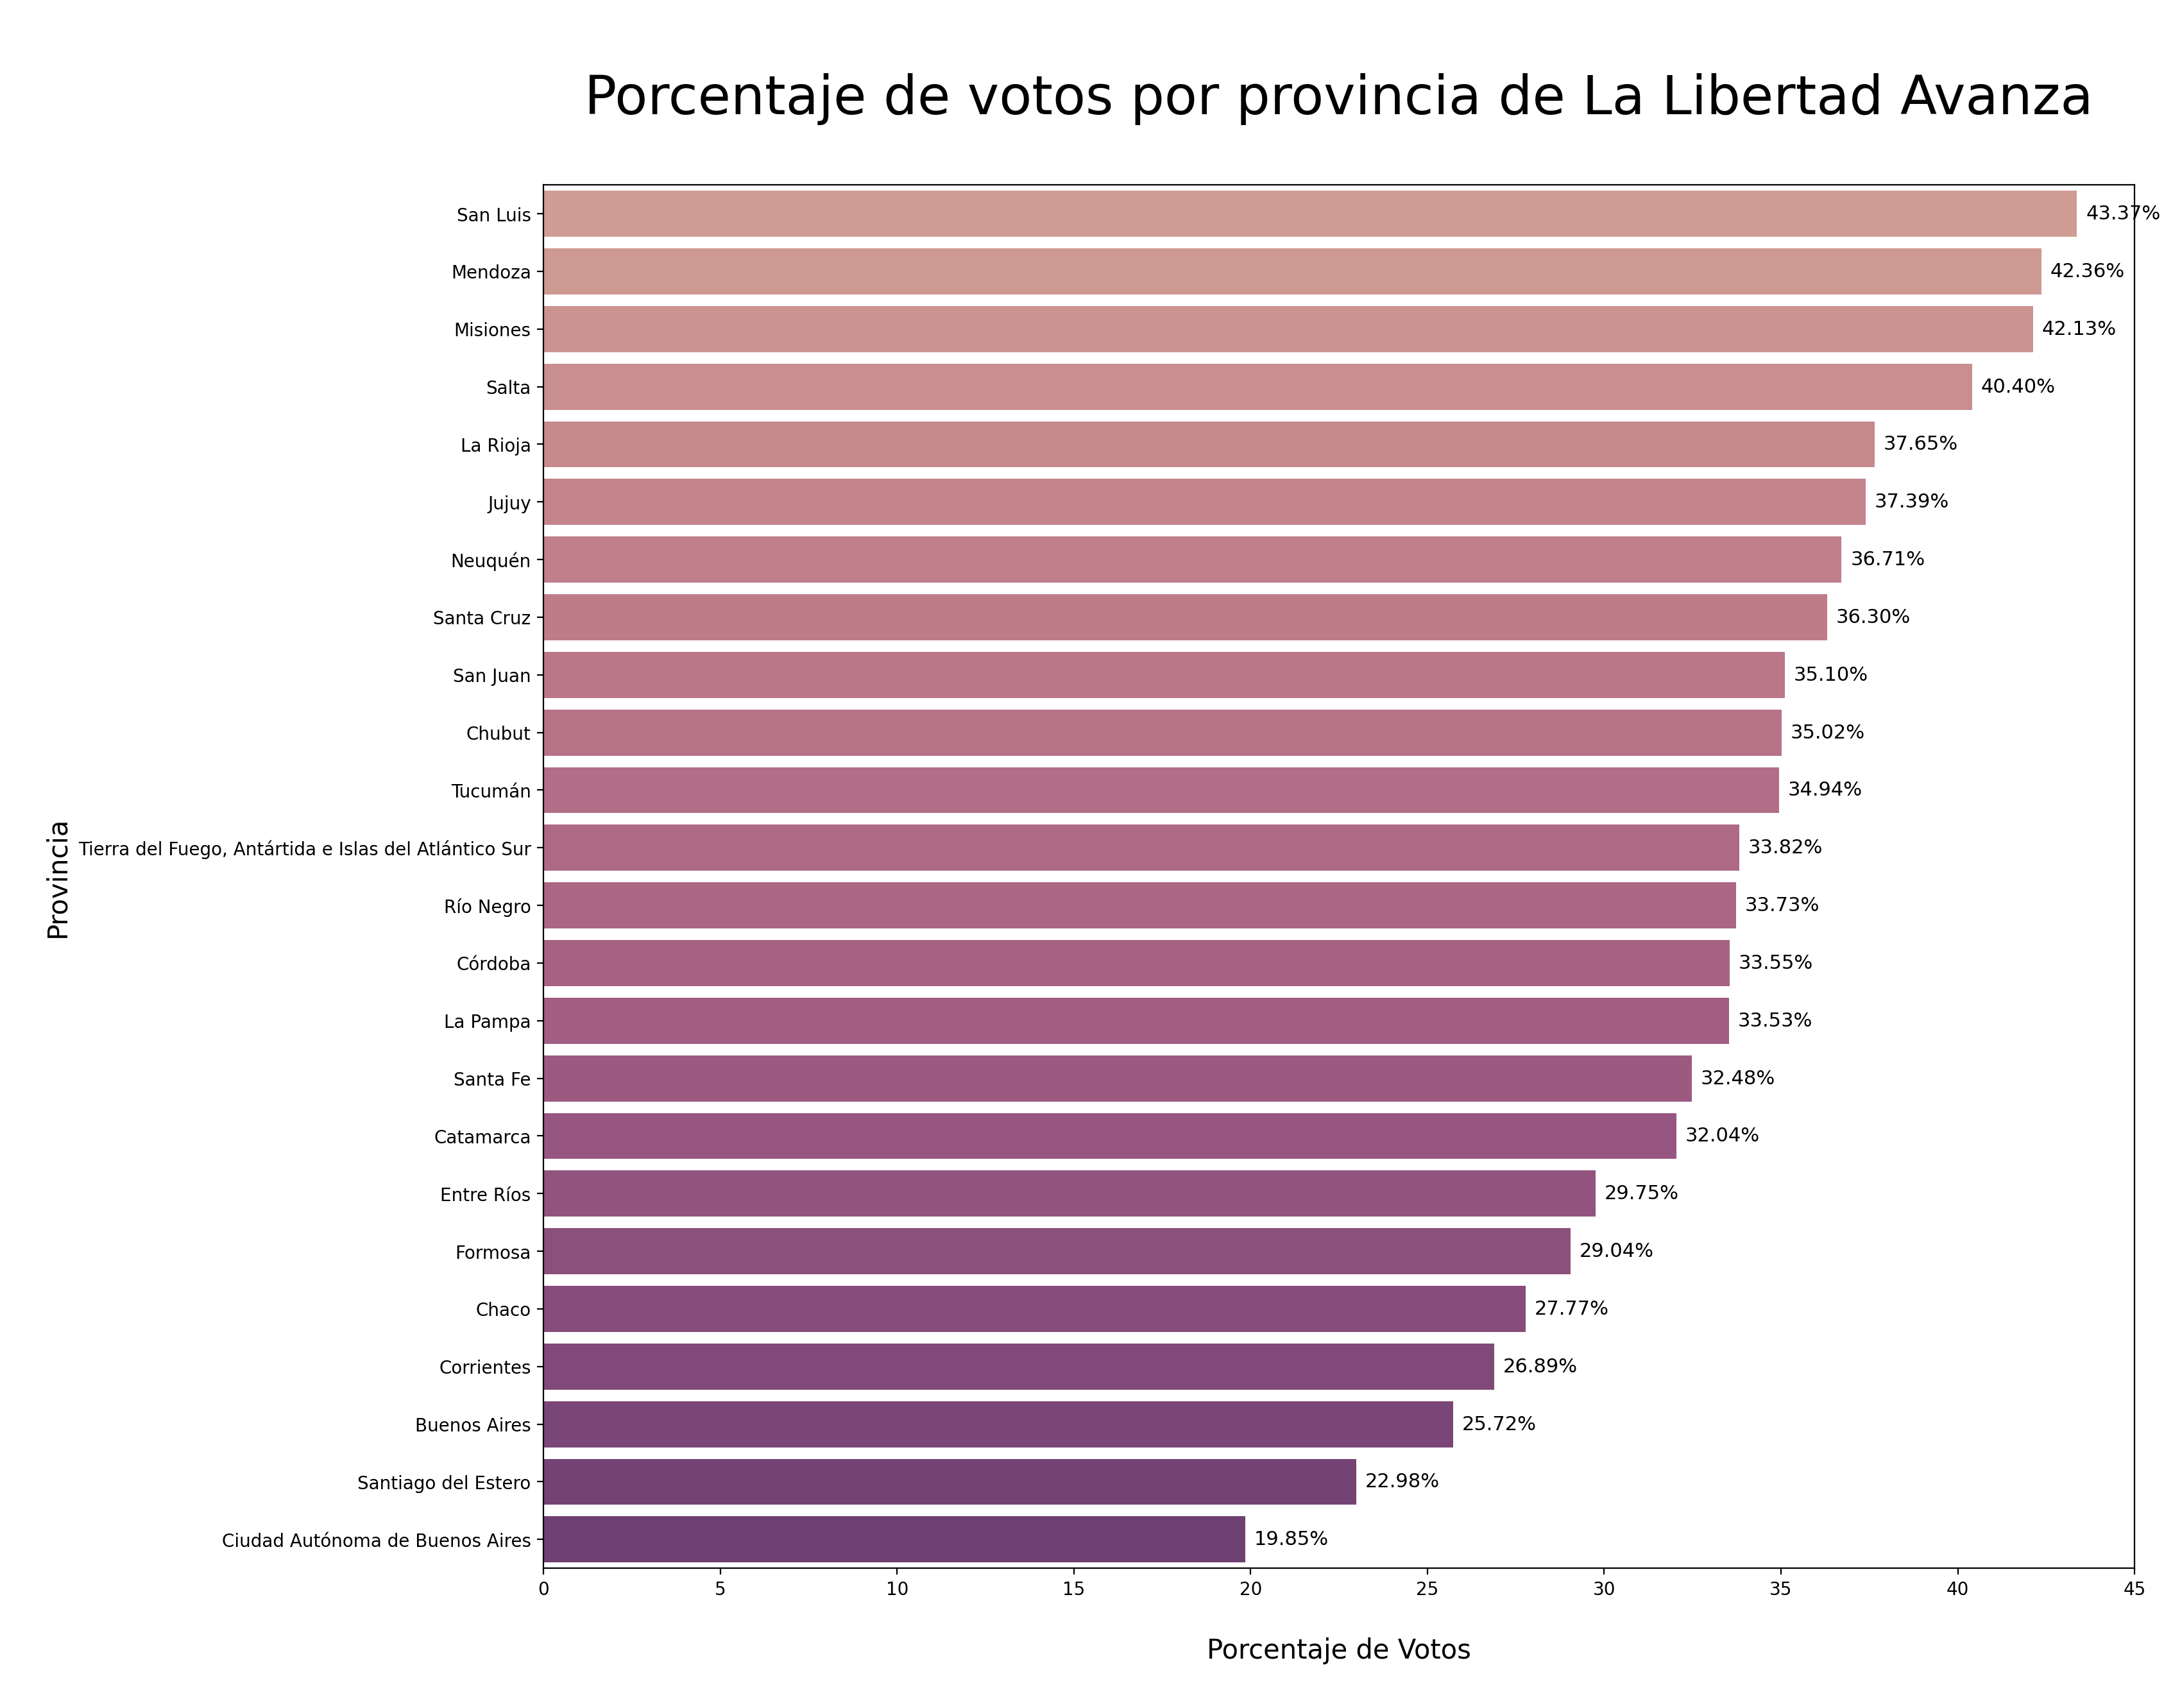

In [30]:
results_lla = results['LA LIBERTAD AVANZA'].reset_index().set_index('distrito_nombre').sort_values('LA LIBERTAD AVANZA',ascending=False)
index_lla = results_lla.index.tolist()
results_lla = results_lla.T

custom_palette = colores_lla(results_lla)
plt.figure(figsize=(16, 14))
chart = sns.barplot(data=results_lla, orient='h', palette=custom_palette, saturation=1)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\nPorcentaje de votos por provincia de La Libertad Avanza\n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia', fontsize=15)
chart.set_xlim(0, 45)

plt.show()

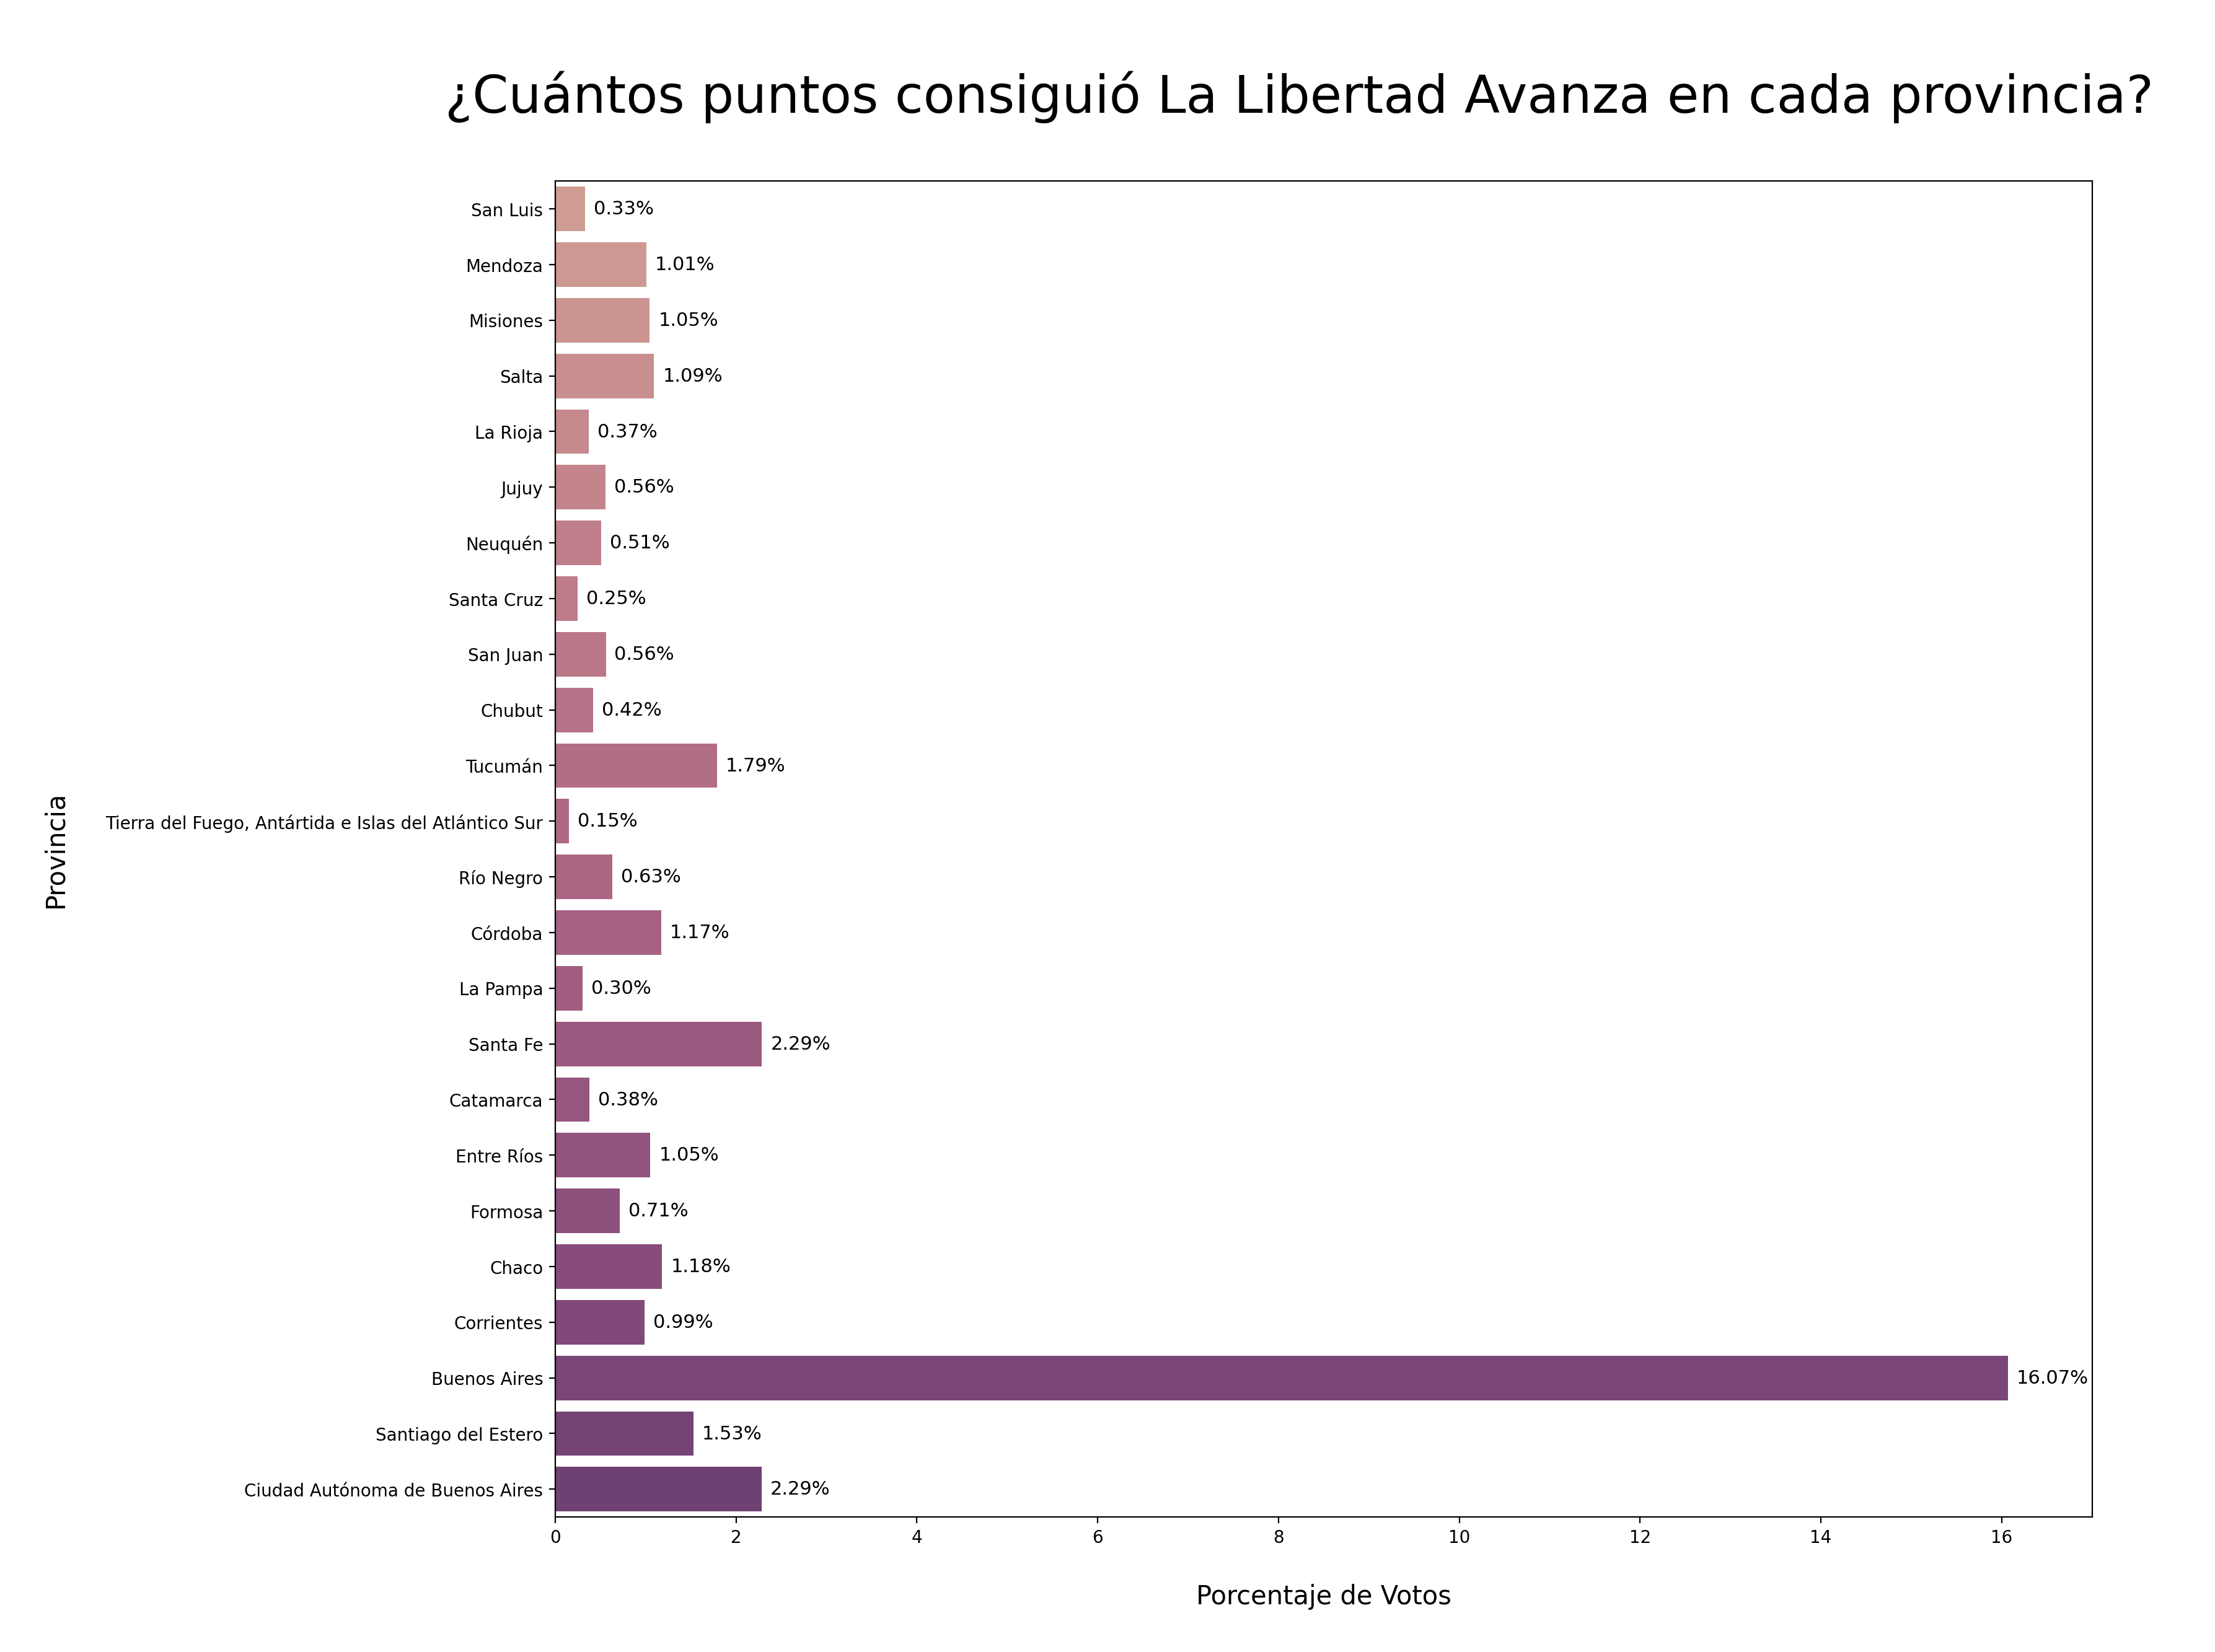

In [32]:
results_3 = df_presidente_dep[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results_3 = round(results_3.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)
results_lla = results_3['LA LIBERTAD AVANZA'].reset_index().set_index('distrito_nombre').sort_values('LA LIBERTAD AVANZA',ascending=False)
results_lla = round(results_lla.div(results_3.sum().sum())*100,3)
results_lla = results_lla.T

custom_palette = colores_lla(results_lla)
plt.figure(figsize=(16, 14))
chart = sns.barplot(data=results_upp, orient='h', palette=custom_palette, saturation=1, order = index_lla)
chart.set_xlim(0,17)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió La Libertad Avanza en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)
plt.show()

## Agrupations Results Distributions


<hr>

Let's create a column in which it is shown the percentage each agrupation got in each table

In [35]:
df_presidente_percen = df_presidente_dep.copy()
df_presidente_percen['votos_porcentaje'] = round(df_presidente_percen.groupby('id_mesa')['votos_cantidad'].transform(lambda x: x / x.sum() * 100),2)
df_mesas_porcen = df_presidente_percen[~df_presidente_percen['agrupacion_nombre'].isin(['FRENTE DE IZQUIERDA', 'HACEMOS POR NUESTRO PAIS'])]
df_mesas_porcen.head()

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad,votos_porcentaje
0,Buenos Aires,2-1-00001-1,350,JUNTOS POR EL CAMBIO,132,POSITIVO,91,32.62
1,Buenos Aires,2-1-00001-1,350,LA LIBERTAD AVANZA,135,POSITIVO,80,28.67
2,Buenos Aires,2-1-00001-1,350,UNION POR LA PATRIA,134,POSITIVO,67,24.01
5,Buenos Aires,2-1-00001-1,350,NaN,0,EN BLANCO,13,4.66
6,Buenos Aires,2-1-00001-1,350,NaN,0,NULO,2,0.72


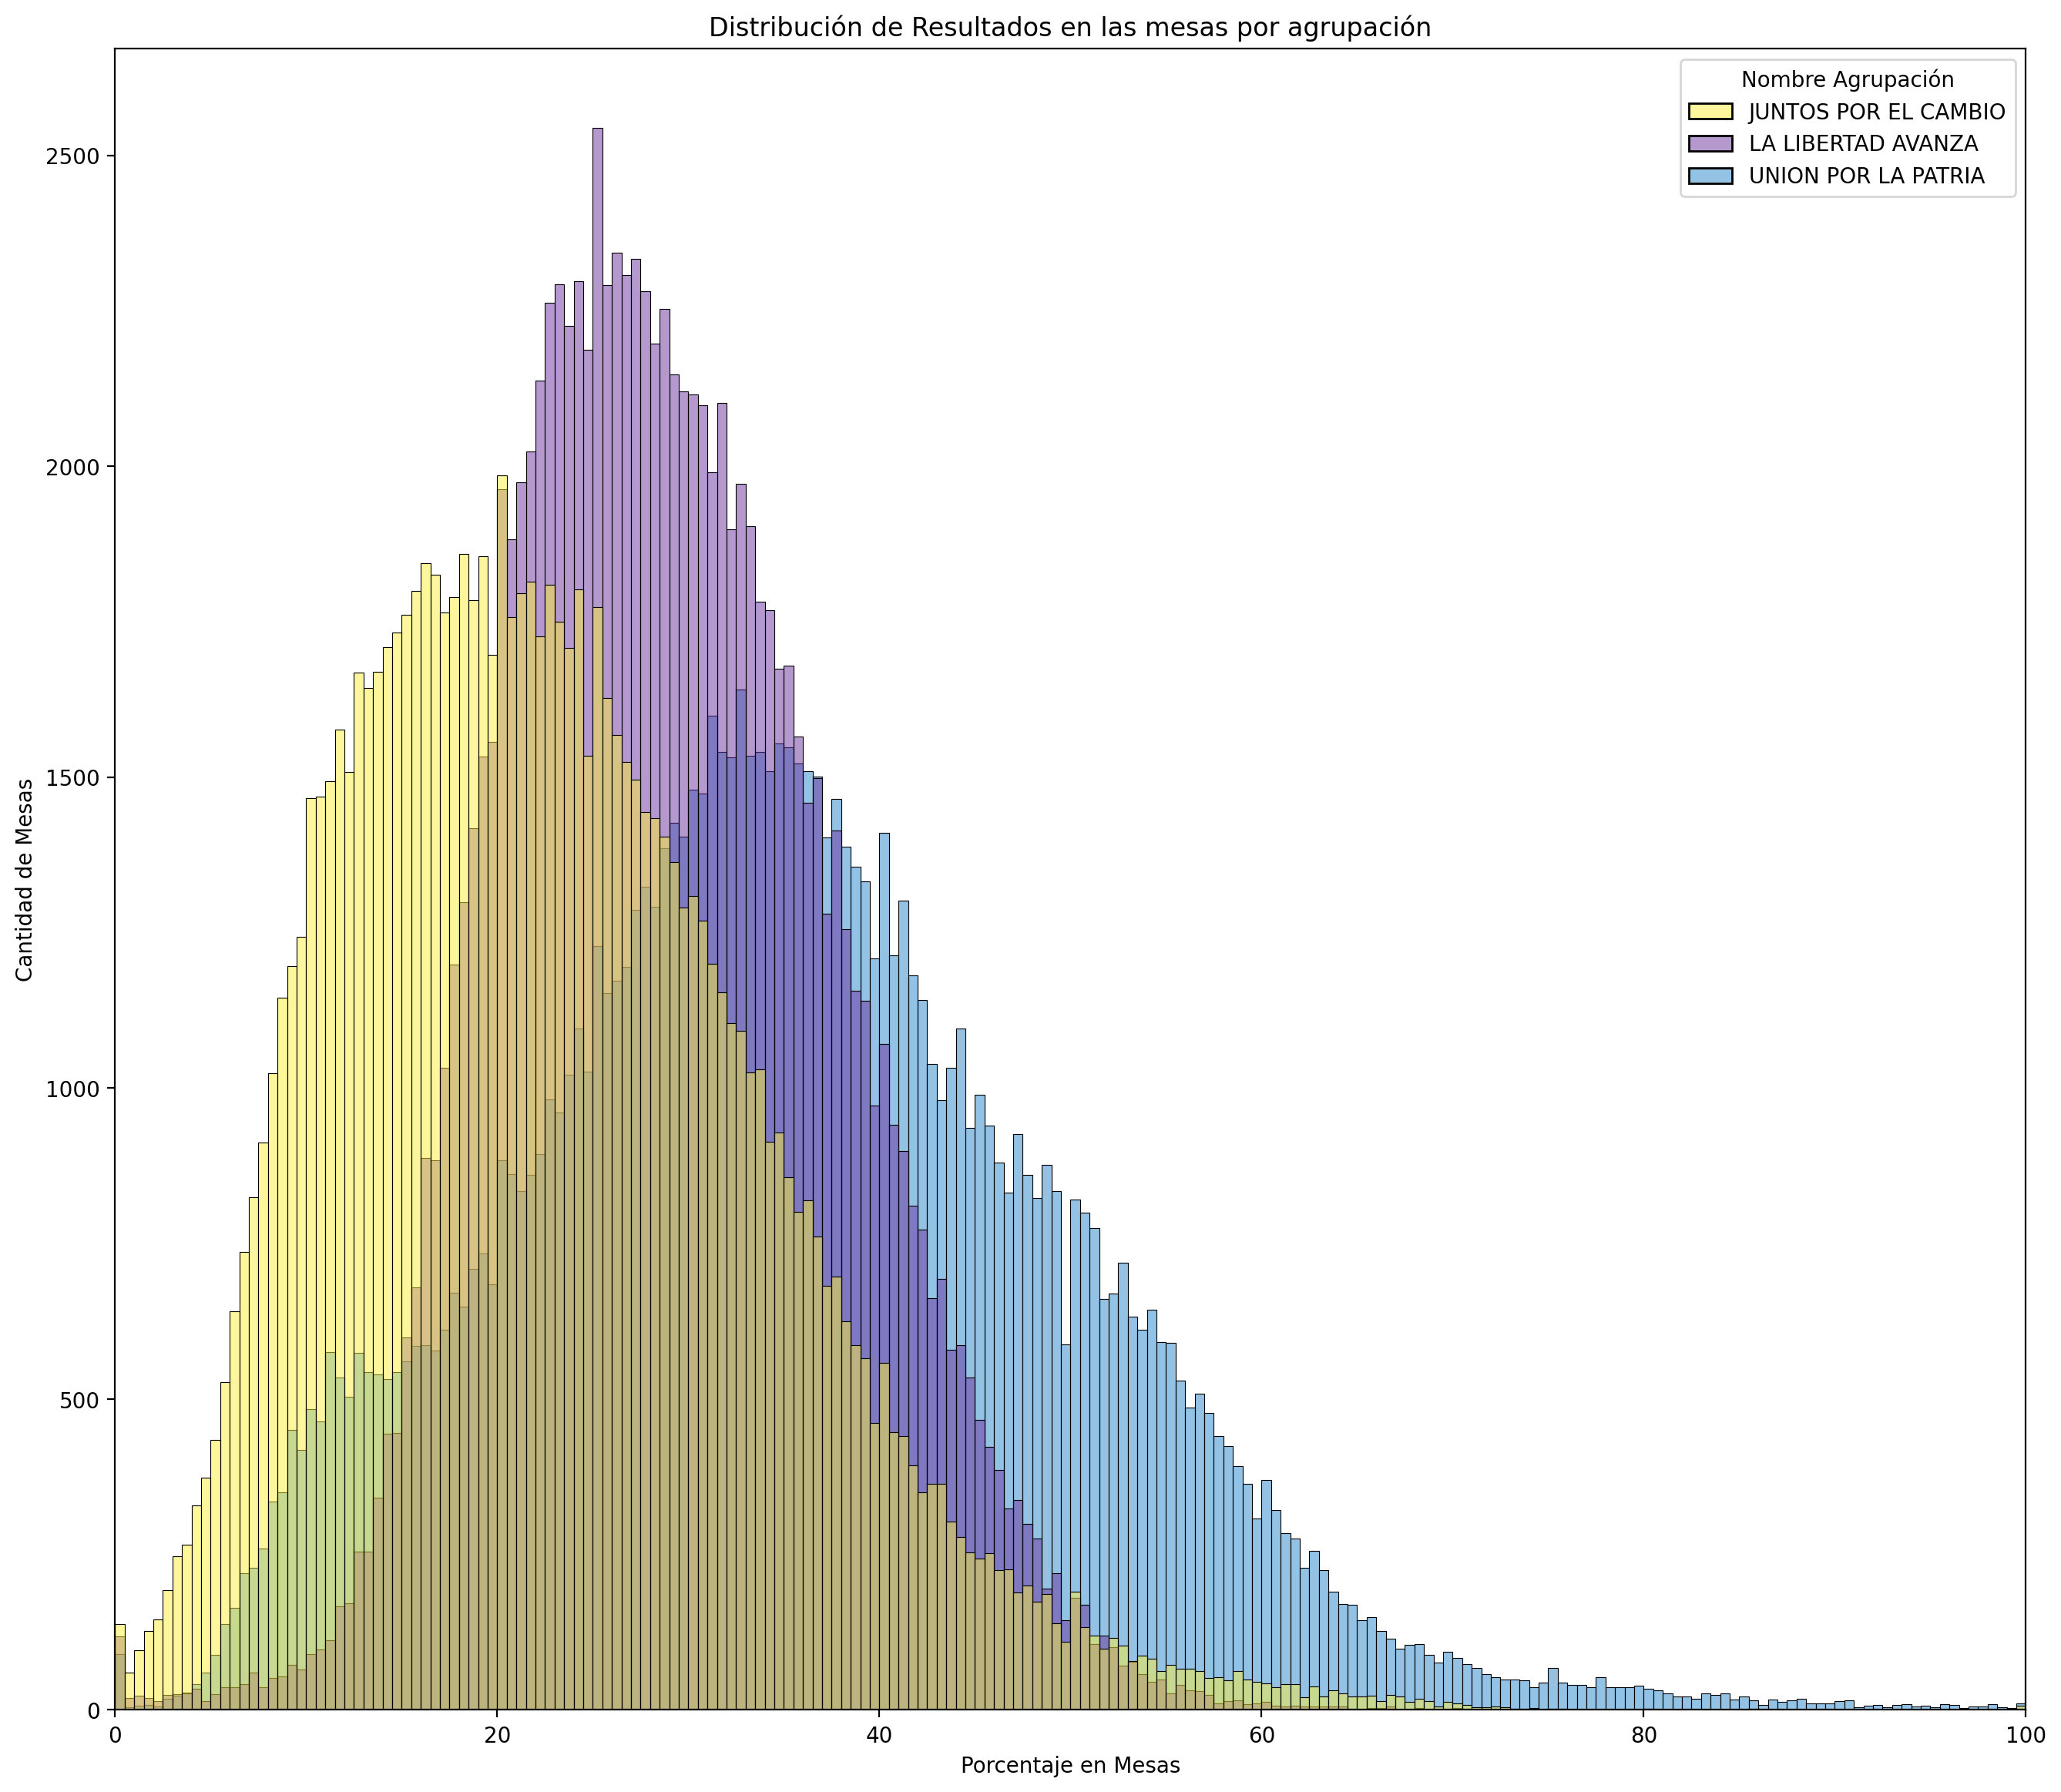

In [61]:
custom_palette = sns.color_palette(['#FCEE3C', '#6A329F', '#2986CC'])
plt.figure(figsize=(16, 14))
chart = sns.histplot(df_mesas_porcen, x="votos_porcentaje", bins=200, hue='agrupacion_nombre', palette = custom_palette)
chart.set(xlim=(0, 100))

plt.title('Distribución de Resultados en las mesas por agrupación')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
legend = plt.gca().get_legend()
legend.set_title('Nombre Agrupación')
plt.show()

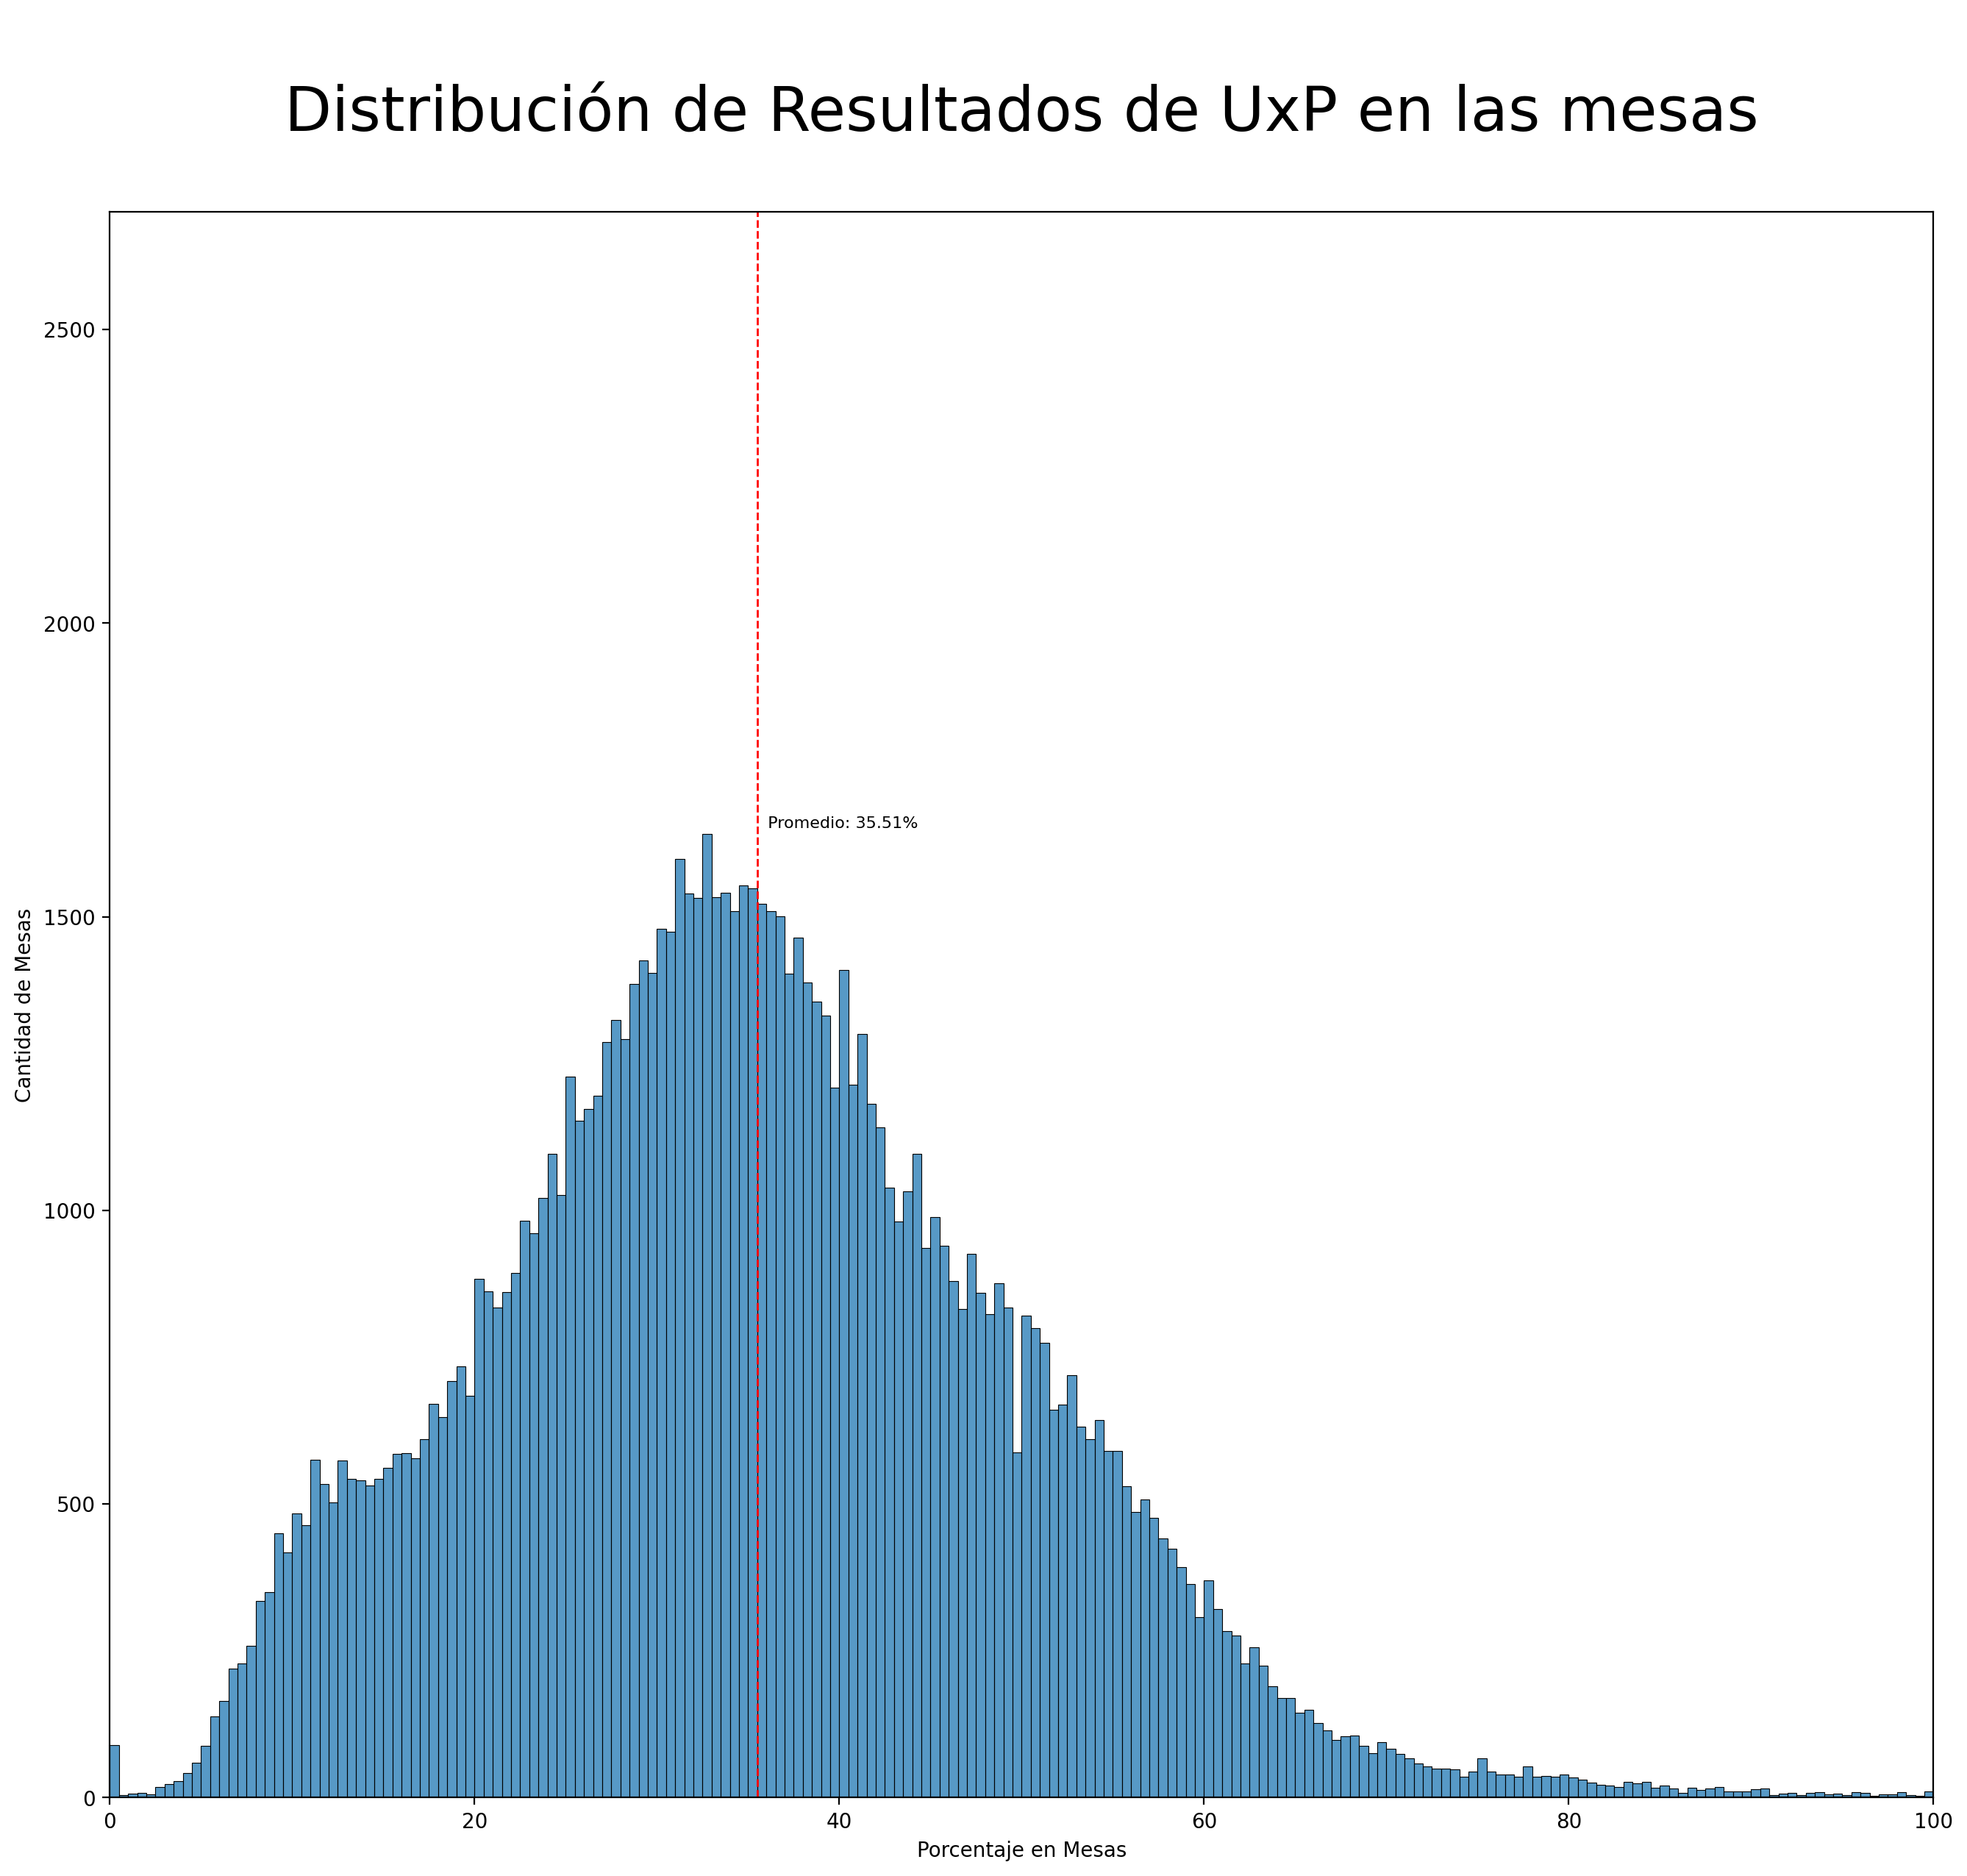

In [71]:
df_mesas_porcen_upp = df_mesas_porcen[df_mesas_porcen['agrupacion_nombre']=='UNION POR LA PATRIA']
promedio = df_mesas_porcen_upp['votos_porcentaje'].mean()

plt.figure(figsize=(16, 14))
chart = sns.histplot(df_mesas_porcen_upp, x="votos_porcentaje", bins=200)
chart.set(xlim=(0, 100))
chart.set_ylim(0,2700)

plt.text(promedio,1700, f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(promedio, color='red', linestyle='--',linewidth=1)

plt.title('\nDistribución de Resultados de UxP en las mesas\n', fontsize=30)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
plt.show()

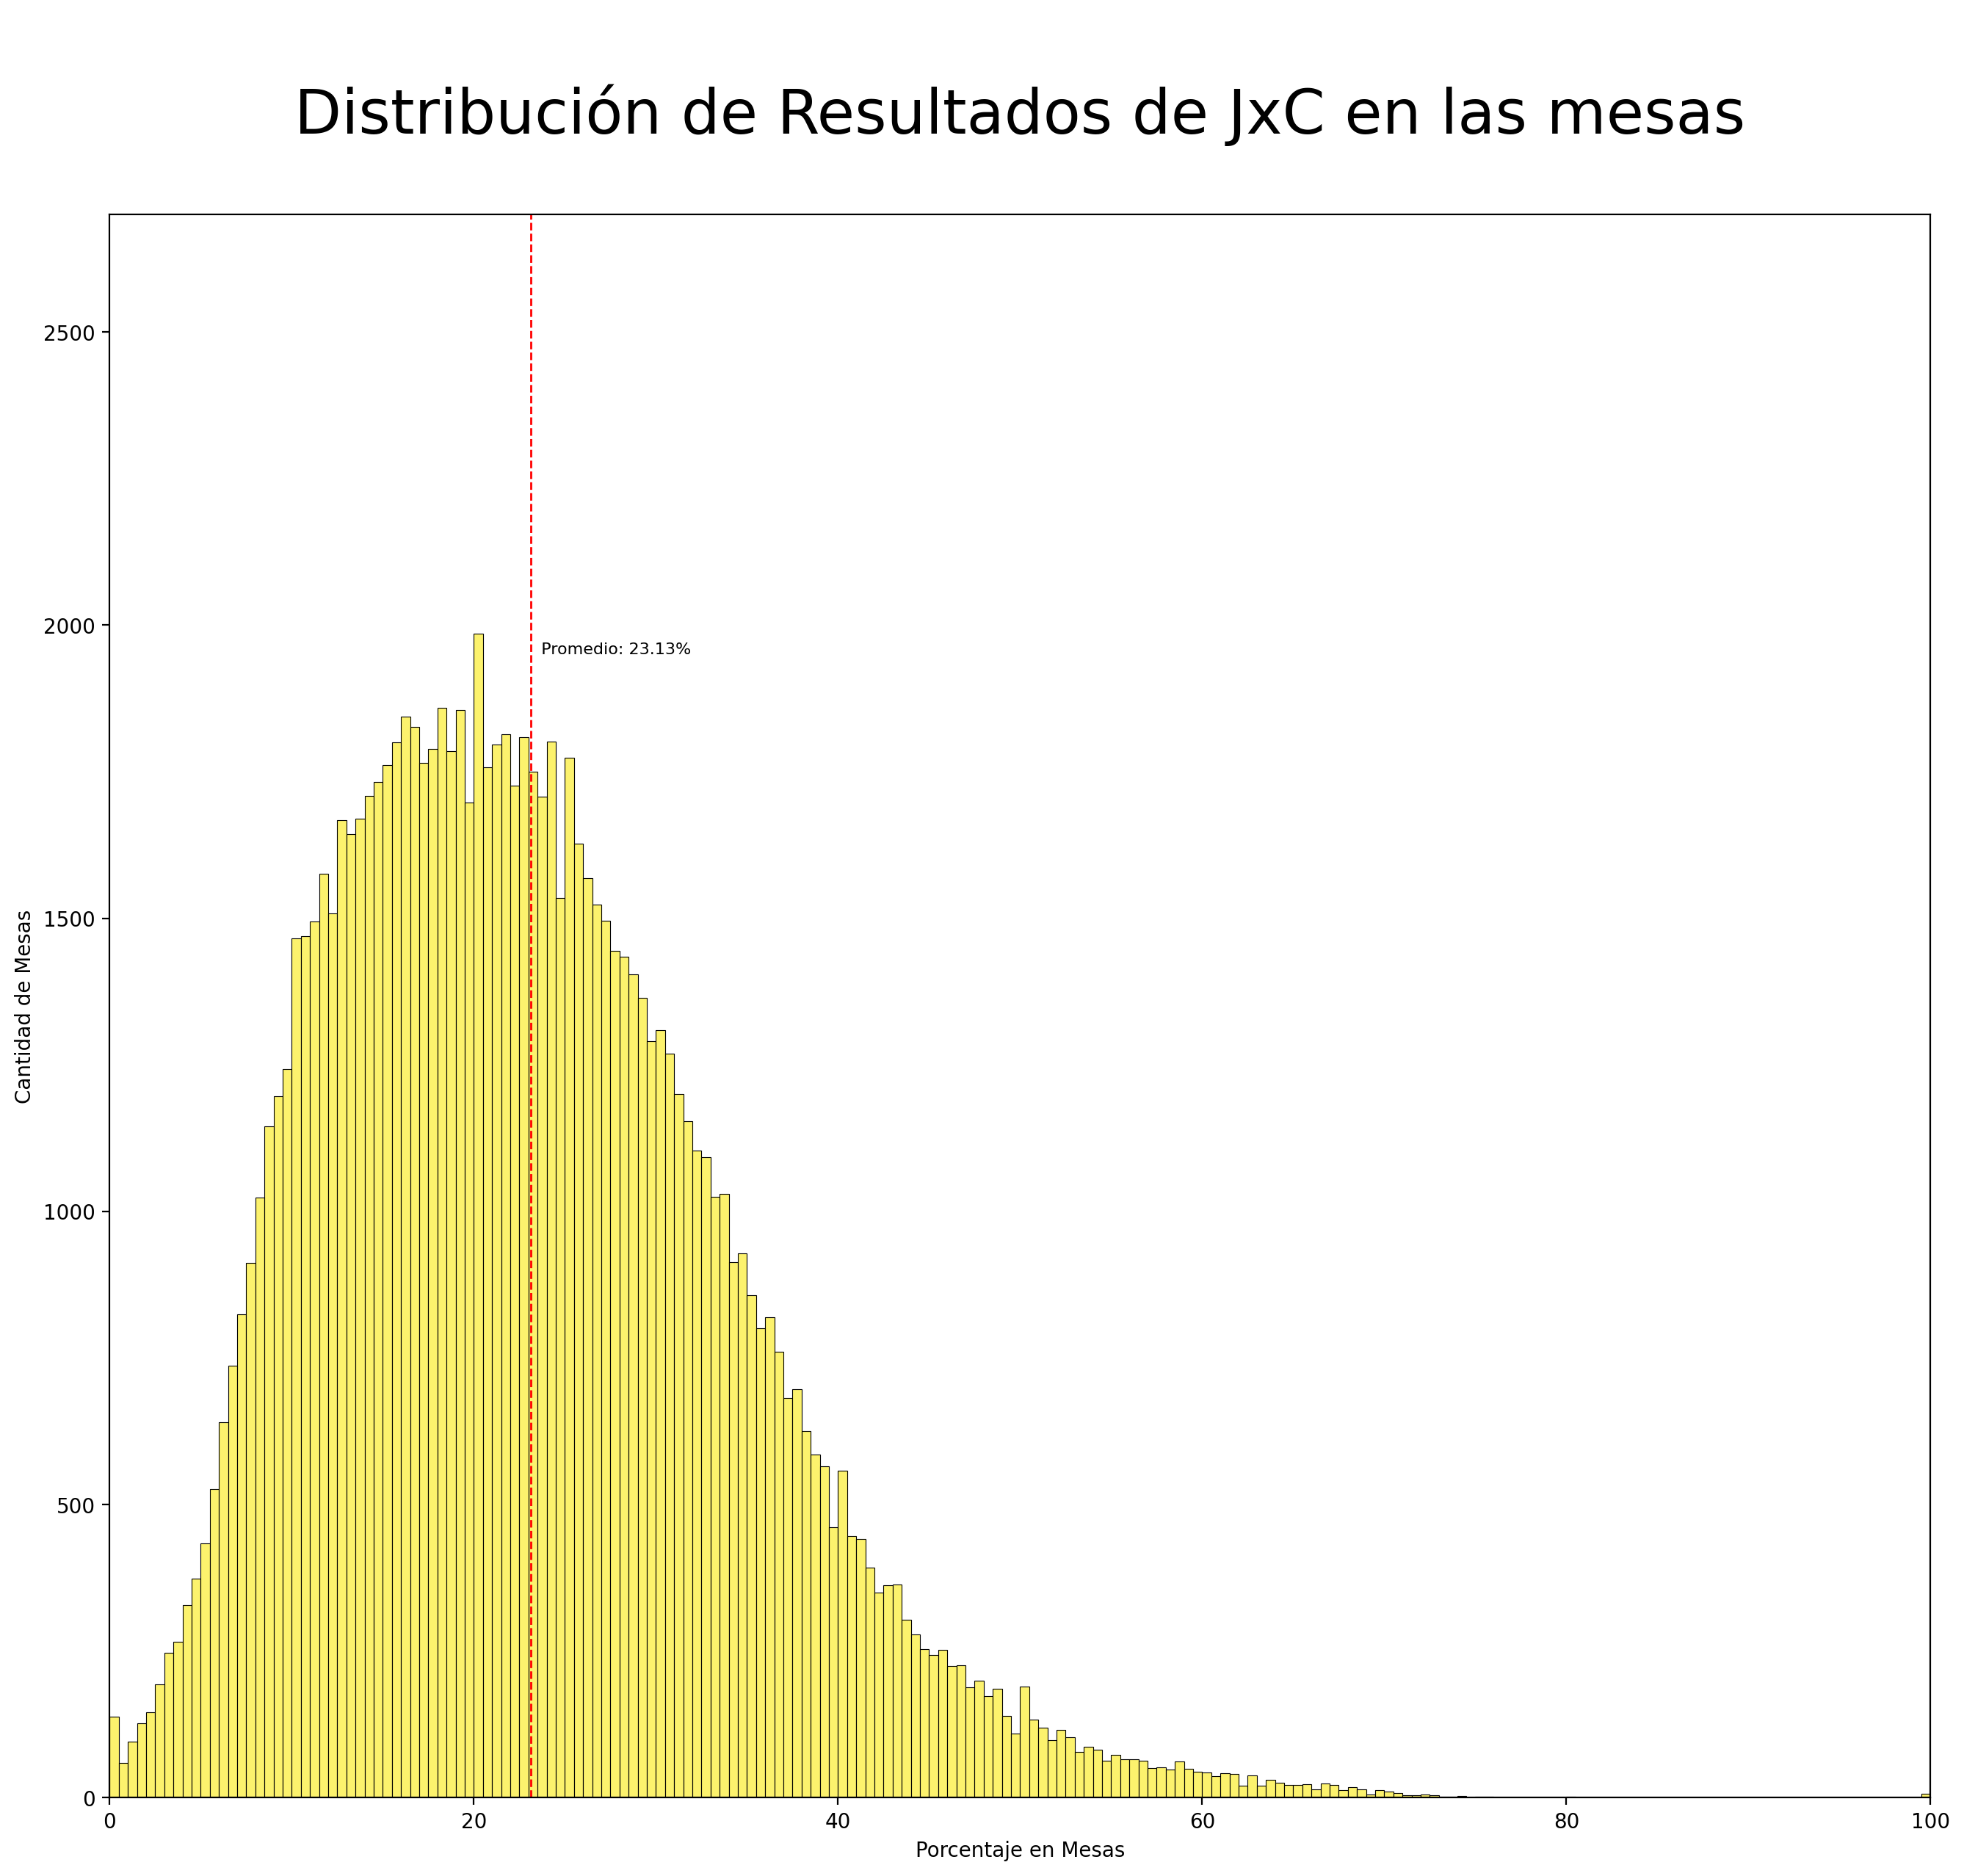

In [70]:
df_mesas_porcen_jxc = df_mesas_porcen[df_mesas_porcen['agrupacion_nombre']=='JUNTOS POR EL CAMBIO']
promedio = df_mesas_porcen_jxc['votos_porcentaje'].mean()

plt.figure(figsize=(16, 14))
chart = sns.histplot(df_mesas_porcen_jxc, x="votos_porcentaje", bins=200, color='#FCEE3C')
chart.set(xlim=(0, 100))
chart.set_ylim(0,2700)

plt.text(promedio,2000, f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(promedio, color='red', linestyle='--',linewidth=1)

plt.title('\nDistribución de Resultados de JxC en las mesas\n', fontsize=30)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
plt.show()

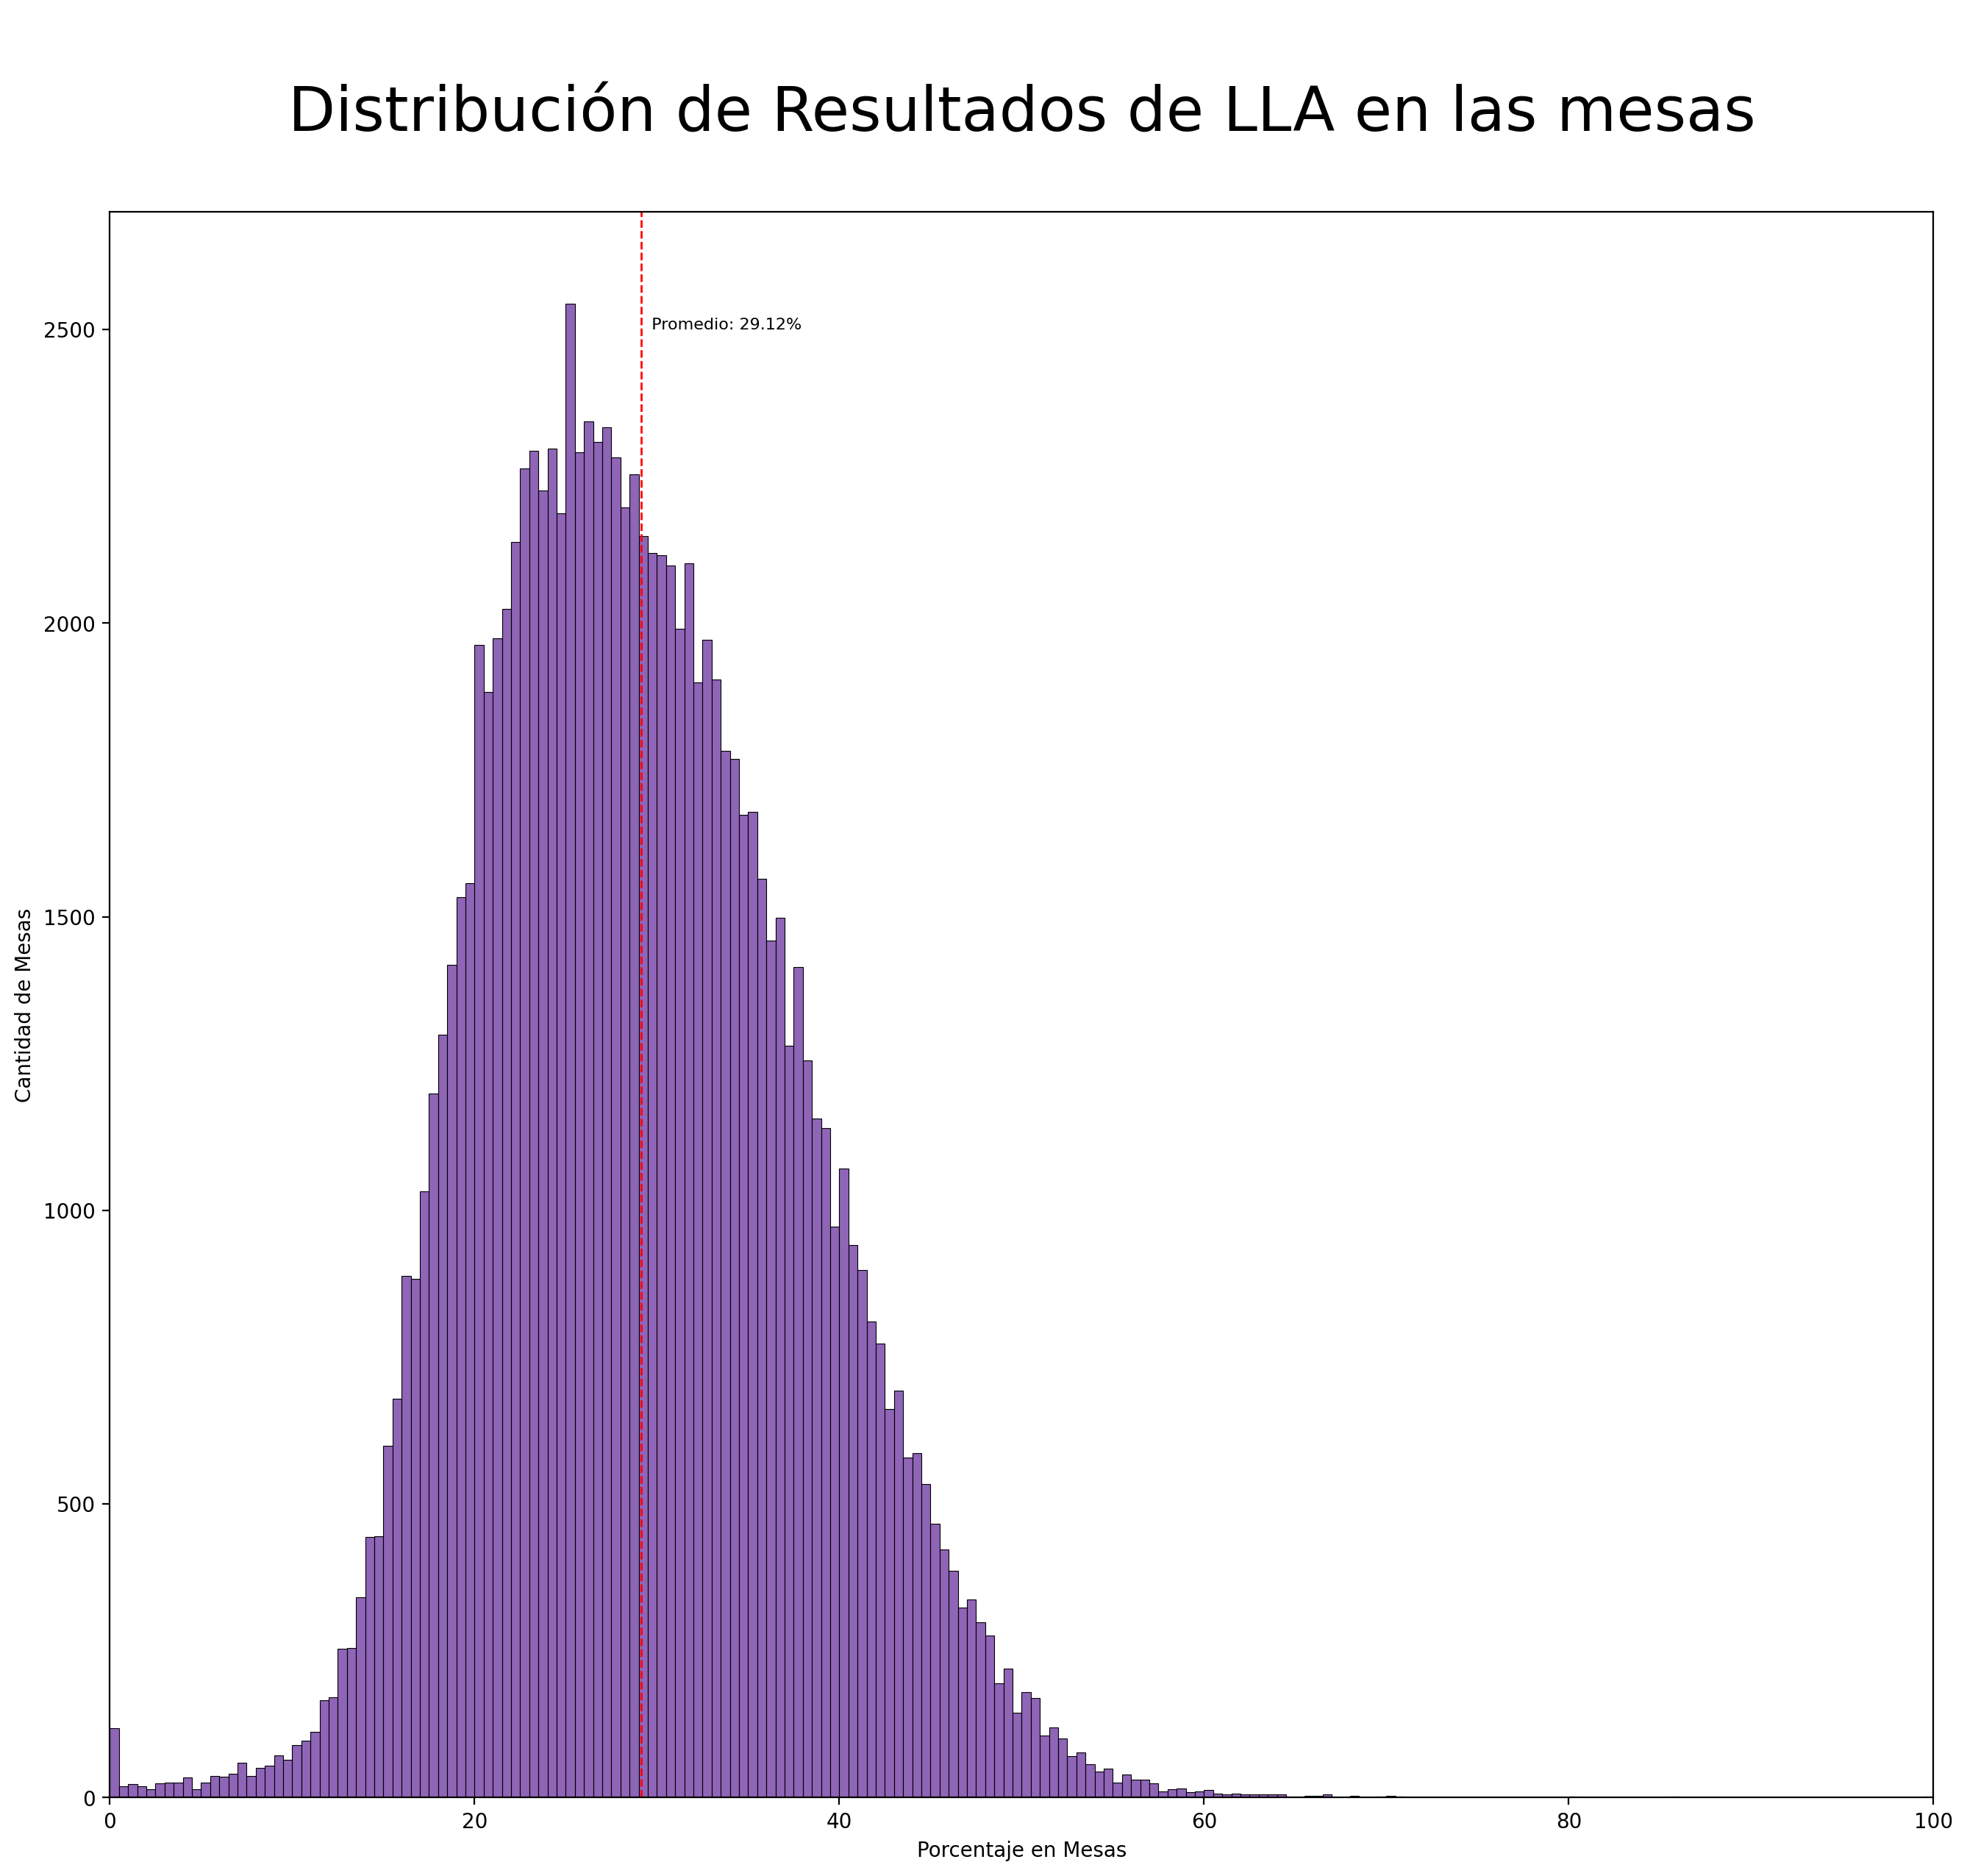

In [69]:
df_mesas_porcen_lla = df_mesas_porcen[df_mesas_porcen['agrupacion_nombre']=='LA LIBERTAD AVANZA']
promedio = df_mesas_porcen_lla['votos_porcentaje'].mean()

plt.figure(figsize=(16, 14))
chart = sns.histplot(df_mesas_porcen_lla, x="votos_porcentaje", bins=200, color='#6A329F')
chart.set(xlim=(0, 100))
chart.set_ylim(0,2700)

plt.text(promedio,2550, f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(promedio, color='red', linestyle='--',linewidth=1)

plt.title('\nDistribución de Resultados de LLA en las mesas\n', fontsize=30)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
plt.show()

## Interesting Results

<hr>

In [74]:
df_presidente_percen = df_presidente_dep.copy()
df_presidente_percen['votos_porcentaje'] = round(df_presidente_percen.groupby('id_mesa')['votos_cantidad'].transform(lambda x: x / x.sum() * 100),2)

Are there any tables were the winner got 100% of the votes?

In [77]:
df1_mesas_porcen_100 = df_presidente_percen[df_presidente_percen['votos_porcentaje']==100].sort_values('votos_porcentaje', axis=0, ascending=False)
df1_mesas_porcen_100.head(8)

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad,votos_porcentaje
210,Buenos Aires,2-1-00001-29,13,JUNTOS POR EL CAMBIO,132,POSITIVO,5,100.00
417010,Chaco,6-3-00036-1142,4,JUNTOS POR EL CAMBIO,132,POSITIVO,1,100.00
998370,Santiago del Estero,22-6-00055-1260,295,JUNTOS POR EL CAMBIO,132,POSITIVO,3,100.00
990340,Santiago del Estero,22-22-00184-2112,293,UNION POR LA PATRIA,134,POSITIVO,229,100.00
987920,Santiago del Estero,22-18-00159-1930,276,UNION POR LA PATRIA,134,POSITIVO,239,100.00
984890,Santiago del Estero,22-12-0107A-1619,124,UNION POR LA PATRIA,134,POSITIVO,122,100.00
978620,Santiago del Estero,22-1-00012-717,294,UNION POR LA PATRIA,134,POSITIVO,220,100.00
908540,Santa Fe,21-11-02780-3510,15,LA LIBERTAD AVANZA,135,POSITIVO,7,100.00


We can see that there are multiple tables where one agrupation got 100% of the votes, but some of those tables have very few votes so the likelihood of seeing a single agrupation getting all the votes is high. So let's filter the tables that have a lot of votes rather than just a few.

In [80]:
df1_mesas_porcen_100 = df1_mesas_porcen_100[df1_mesas_porcen_100['votos_cantidad']>20]
df1_mesas_porcen_100

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad,votos_porcentaje
990340,Santiago del Estero,22-22-00184-2112,293,UNION POR LA PATRIA,134,POSITIVO,229,100.00
987920,Santiago del Estero,22-18-00159-1930,276,UNION POR LA PATRIA,134,POSITIVO,239,100.00
984890,Santiago del Estero,22-12-0107A-1619,124,UNION POR LA PATRIA,134,POSITIVO,122,100.00
978620,Santiago del Estero,22-1-00012-717,294,UNION POR LA PATRIA,134,POSITIVO,220,100.00
627410,Entre Ríos,8-1-00002-64,349,JUNTOS POR EL CAMBIO,132,POSITIVO,115,100.00
998390,Santiago del Estero,22-6-00055-1262,293,UNION POR LA PATRIA,134,POSITIVO,216,100.00


Interestingly, not only we can see that 7 out of 8 of the tables were the winner got 100% of the votes the winner was UNION POR LA PATRIA, but also how all those 7 tables were in the same district, Santiago del Estero.

In [81]:
df1_mesas_porcen_100.value_counts(['agrupacion_nombre'])

agrupacion_nombre   
UNION POR LA PATRIA     5
JUNTOS POR EL CAMBIO    1
dtype: int64

<hr>

What about tables were the winner got 90% or more of the votes?

In [85]:
df1_mesas_porcen_90 = df_presidente_percen[df_presidente_percen['votos_porcentaje']>=90].sort_values('votos_porcentaje', axis=0, ascending=False)
df1_mesas_porcen_90 = df1_mesas_porcen_90[df1_mesas_porcen_90['votos_cantidad']>20]
df1_mesas_porcen_90.value_counts(['agrupacion_nombre'])

agrupacion_nombre   
UNION POR LA PATRIA     138
JUNTOS POR EL CAMBIO      1
dtype: int64

138 tables out of 139 were the winner got 90% of the votes or more UNION POR LA PATRIA was the winner.

Let's see where these tables were:

In [86]:
df1_mesas_porcen_90.value_counts(['distrito_nombre'])

distrito_nombre    
Santiago del Estero    107
Salta                   23
Tucumán                  4
Chaco                    2
Entre Ríos               1
Formosa                  1
La Rioja                 1
dtype: int64

Interestingly, 107 out of 139 are from Santiago del Estero. In other words, 107 out of the 139 tables were the winner got the greatest percentage in the whole country were in Santiago del Estero, and in 137 out of 138 the winner was UNION POR LA PATRIA.

<hr>

What about tables were the winner got 80% or more of the votes?

In [89]:
df1_mesas_porcen_80 = df_presidente_percen[df_presidente_percen['votos_porcentaje']>=80].sort_values('votos_porcentaje', axis=0, ascending=False)
df1_mesas_porcen_80 = df1_mesas_porcen_80[df1_mesas_porcen_80['votos_cantidad']>20]
df1_mesas_porcen_80.value_counts(['agrupacion_nombre'])

agrupacion_nombre   
UNION POR LA PATRIA     522
JUNTOS POR EL CAMBIO      2
LA LIBERTAD AVANZA        1
dtype: int64

522 tables out of 525 were the winner got 80% of the votes or more UNION POR LA PATRIA was the winner.

Let's see where these tables were:

In [90]:
df1_mesas_porcen_80.value_counts(['distrito_nombre'])

distrito_nombre    
Santiago del Estero    367
Salta                   48
Formosa                 31
Tucumán                 28
Chaco                   18
La Rioja                14
Neuquén                  7
Buenos Aires             3
Catamarca                3
Corrientes               3
Entre Ríos               1
Misiones                 1
Río Negro                1
dtype: int64

Interestingly, 367 out of 525 are from Santiago del Estero. In other words, 367 out of the 525 tables were the winner got the greatest percentage in the whole country were in Santiago del Estero, and in 522 out of 525 the winner was UNION POR LA PATRIA.

<hr>

What about tables were the winner got 50% or more of the votes?

In [91]:
df1_mesas_porcen_50 = df_presidente_percen[df_presidente_percen['votos_porcentaje']>=50].sort_values('votos_porcentaje', axis=0, ascending=False)
df1_mesas_porcen_50 = df1_mesas_porcen_50[df1_mesas_porcen_50['votos_cantidad']>20]
df1_mesas_porcen_50.value_counts(['agrupacion_nombre'])

agrupacion_nombre       
UNION POR LA PATRIA         16476
JUNTOS POR EL CAMBIO         2139
LA LIBERTAD AVANZA           1235
HACEMOS POR NUESTRO PAIS      109
FRENTE DE IZQUIERDA             1
dtype: int64

16476 tables out of 19960 were the winner got 50% of the votes or more UNION POR LA PATRIA was the winner.

Let's see where these tables were:

In [93]:
df1_mesas_porcen_50.value_counts(['distrito_nombre'])

distrito_nombre                                      
Buenos Aires                                             9449
Santiago del Estero                                      2124
Ciudad Autónoma de Buenos Aires                          1439
Tucumán                                                  1313
Chaco                                                     830
Formosa                                                   790
Salta                                                     689
Misiones                                                  569
Corrientes                                                501
Mendoza                                                   464
Santa Fe                                                  342
La Rioja                                                  203
Catamarca                                                 197
Córdoba                                                   189
San Luis                                                  160
Entre Ríos      

In this case, tables were more or less distributed evenly across the districts

<hr>

<hr>

<hr>

Let's filter out the tables were the number of total votes were 0

In [127]:
tables_0 = df_presidente_percen.groupby('id_mesa')['votos_cantidad'].sum().reset_index()
tables_with_votes = tables_0[tables_0['votos_cantidad']>=20]
index_mesas_with_votes = tables_with_votes['id_mesa'].tolist()

In [128]:
df_tables_with_votes = df_presidente_percen[df_presidente_percen['id_mesa'].isin(index_mesas_with_votes)]

Having filtered those tables, are there any tables were one of the top 3 agrupations got 0 votes?

In [130]:
df_tables_with_votes_UxP = df_tables_with_votes[df_tables_with_votes['agrupacion_nombre']=='UNION POR LA PATRIA']
df_tables_with_votes_UxP = df_tables_with_votes_UxP[df_tables_with_votes_UxP['votos_cantidad']==0]
df_tables_with_votes_UxP.shape

(35, 8)

In [131]:
df_tables_with_votes_JxC = df_tables_with_votes[df_tables_with_votes['agrupacion_nombre']=='JUNTOS POR EL CAMBIO']
df_tables_with_votes_JxC = df_tables_with_votes_JxC[df_tables_with_votes_JxC['votos_cantidad']==0]
df_tables_with_votes_JxC.shape

(67, 8)

In [132]:
df_tables_with_votes_LLA = df_tables_with_votes[df_tables_with_votes['agrupacion_nombre']=='LA LIBERTAD AVANZA']
df_tables_with_votes_LLA = df_tables_with_votes_LLA[df_tables_with_votes_LLA['votos_cantidad']==0]
df_tables_with_votes_LLA.shape

(74, 8)

Across the country, (Taking into consideration only tables that have 20 or more votes) there are 35 tables were UNION POR LA PATRIA got 0 votes; 67 were JUNTOS POR EL CAMBIO got 0 votes and 74 were LA LIBERTAD AVANZA got 0 votes. Let's see who were the winners of those tables:

In [133]:
index_upp = df_tables_with_votes_UxP['id_mesa'].tolist()
winners_uxp = df_presidente_percen[df_presidente_percen['id_mesa'].isin(index_upp)]
max_votos = winners_uxp.groupby('id_mesa')['votos_cantidad'].transform('max')
winners_uxp = winners_uxp[winners_uxp['votos_cantidad'] == max_votos]
winners_uxp['agrupacion_nombre'].value_counts()

LA LIBERTAD AVANZA          22
JUNTOS POR EL CAMBIO        11
HACEMOS POR NUESTRO PAIS     3
Name: agrupacion_nombre, dtype: int64

Out of the 35 tables were UxP got 0 votes, LLA won 22 and JxC won 11

In [134]:
index_jxc = df_tables_with_votes_JxC['id_mesa'].tolist()
winners_jxc = df_presidente_percen[df_presidente_percen['id_mesa'].isin(index_jxc)]
max_votos = winners_jxc.groupby('id_mesa')['votos_cantidad'].transform('max')
winners_jxc = winners_jxc[winners_jxc['votos_cantidad'] == max_votos]
winners_jxc['agrupacion_nombre'].value_counts()

UNION POR LA PATRIA         61
LA LIBERTAD AVANZA           5
HACEMOS POR NUESTRO PAIS     1
Name: agrupacion_nombre, dtype: int64

Out of the 67 tables were JxC got 0 votes, UxP won 61 and LLA won 5

In [135]:
index_lla = df_tables_with_votes_LLA['id_mesa'].tolist()
winners_lla = df_presidente_percen[df_presidente_percen['id_mesa'].isin(index_lla)]
max_votos = winners_lla.groupby('id_mesa')['votos_cantidad'].transform('max')
winners_lla = winners_lla[winners_lla['votos_cantidad'] == max_votos]
winners_lla['agrupacion_nombre'].value_counts()

UNION POR LA PATRIA         62
JUNTOS POR EL CAMBIO         9
HACEMOS POR NUESTRO PAIS     2
Name: agrupacion_nombre, dtype: int64

Out of the 73 tables were LLA got 0 votes, UxP won 62 and JxC won 9

In other words, most of the tables were one of the top 3 agrupations got 0 votes, the winner was UxP

## Difference with PASO Elections

<hr>

Let's see the diference between the results each candidate of each agrupation got in the PASO Elections and the General Elections

In [3]:
generales = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones PASO/GENERALES_PRESIDENTE.csv')
paso = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones PASO/PASO_PRESIDENTE.csv')

C:\Users\Marcos\AppData\Local\Temp\ipykernel_16700\1848201885.py:2: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  paso = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones PASO/PASO_PRESIDENTE.csv')


In [4]:
paso['id_mesa'] = paso['distrito_nombre'].astype(str)+'/'+paso['seccion_nombre'].astype(str)+'/'+paso['circuito_id'].astype(str)+'/'+paso['mesa_id'].astype(str)
paso1 = paso.drop(['año',
                          'eleccion_tipo',
                          'recuento_tipo',
                          'padron_tipo',
                          'seccionprovincial_nombre',
                          'seccion_nombre',
                          'mesa_tipo',
                          'circuito_nombre',
                          'seccionprovincial_id',
                          'circuito_id',
                          'mesa_id',
                          'seccion_id',
                          'cargo_id',
                          'lista_numero',
                          # 'lista_nombre',
                          'cargo_nombre',
                          ],
                         axis = 1) # .head(10)

PASO = paso1[['distrito_nombre','distrito_id','id_mesa','mesa_electores','agrupacion_nombre','lista_nombre','agrupacion_id','votos_tipo','votos_cantidad']]
PASO = PASO.sort_values(['distrito_id','id_mesa']).reset_index(drop=True)
PASO['agrupacion_nombre'] = PASO['agrupacion_nombre'].replace(['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], 'FRENTE DE IZQUIERDA')
PASO.head(5)

,distrito_nombre,distrito_id,id_mesa,mesa_electores,agrupacion_nombre,lista_nombre,agrupacion_id,votos_tipo,votos_cantidad
0,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,PRINCIPIOS Y VALORES,"1A- TIERRA, TECHO Y TRABAJO",137,POSITIVO,3
1,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,HACEMOS POR NUESTRO PAIS,A- HACEMOS,133,POSITIVO,3
2,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,UNION POR LA PATRIA,A- CELESTE Y BLANCA,134,POSITIVO,49
3,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,UNION POR LA PATRIA,B- JUSTA Y SOBERANA,134,POSITIVO,25
4,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,FRENTE LIBER.AR,A- DEMOS,131,POSITIVO,0


In [5]:
generales['id_mesa'] = generales['distrito_nombre'].astype(str)+'/'+generales['seccion_nombre'].astype(str)+'/'+generales['circuito_id'].astype(str)+'/'+generales['mesa_id'].astype(str)
generales1 = generales.drop(['año',
                          'eleccion_tipo',
                          'recuento_tipo',
                          'padron_tipo',
                          'seccionprovincial_nombre',
                          'seccion_nombre',
                          'mesa_tipo',
                          'circuito_nombre',
                          'seccionprovincial_id',
                          'circuito_id',
                          'mesa_id',
                          'seccion_id',
                          'cargo_id',
                          'lista_numero',
                          'lista_nombre',
                          'cargo_nombre',
                          ],
                         axis = 1) # .head(10)

GENERALES = generales1[['distrito_nombre','distrito_id','id_mesa','mesa_electores','agrupacion_nombre','agrupacion_id','votos_tipo','votos_cantidad']]
GENERALES = GENERALES.sort_values(['distrito_id','id_mesa']).reset_index(drop=True)
GENERALES['agrupacion_nombre'] = GENERALES['agrupacion_nombre'].replace(['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], 'FRENTE DE IZQUIERDA')
GENERALES.head(5)

,distrito_nombre,distrito_id,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad
0,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,345,UNION POR LA PATRIA,134,POSITIVO,96
1,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,345,JUNTOS POR EL CAMBIO,132,POSITIVO,65
2,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,345,LA LIBERTAD AVANZA,135,POSITIVO,44
3,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,345,FRENTE DE IZQUIERDA,136,POSITIVO,13
4,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,345,HACEMOS POR NUESTRO PAIS,133,POSITIVO,4


In [6]:
PASO_PERCENTAGE = PASO.copy()
PASO_PERCENTAGE['votos_porcentaje'] = round(PASO_PERCENTAGE.groupby('id_mesa')['votos_cantidad'].transform(lambda x: x / x.sum() * 100),2)

In [7]:
GENERALES_PERCENTAGE = GENERALES.copy()
GENERALES_PERCENTAGE['votos_porcentaje'] = round(GENERALES_PERCENTAGE.groupby('id_mesa')['votos_cantidad'].transform(lambda x: x / x.sum() * 100),2)

In [8]:
PASO_PERCENTAGE_TOP_3 = PASO_PERCENTAGE[PASO_PERCENTAGE['agrupacion_nombre'].isin(['UNION POR LA PATRIA','JUNTOS POR EL CAMBIO','LA LIBERTAD AVANZA'])]
PASO_PERCENTAGE_TOP_3 = PASO_PERCENTAGE_TOP_3[PASO_PERCENTAGE_TOP_3['lista_nombre'].isin(['A- CELESTE Y BLANCA','B- LA FUERZA DEL CAMBIO','A- LIBERTAD POR SIEMPRE'])]
PASO_PERCENTAGE_TOP_3 = PASO_PERCENTAGE_TOP_3.drop('lista_nombre',axis=1).reset_index(drop=True)

In [9]:
GENERALES_PERCENTAGE_TOP_3 = GENERALES_PERCENTAGE[GENERALES_PERCENTAGE['agrupacion_nombre'].isin(['UNION POR LA PATRIA','JUNTOS POR EL CAMBIO','LA LIBERTAD AVANZA'])]

In [10]:
GENERALES_PERCENTAGE_TOP_3_reduced = GENERALES_PERCENTAGE_TOP_3[['id_mesa','agrupacion_nombre','votos_cantidad','votos_porcentaje']]
GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['UNION POR LA PATRIA'], 'UNION POR LA PATRIA - Generales')
GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['JUNTOS POR EL CAMBIO'], 'JUNTOS POR EL CAMBIO - Generales')
GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['LA LIBERTAD AVANZA'], 'LA LIBERTAD AVANZA - Generales')

C:\Users\Marcos\AppData\Local\Temp\ipykernel_16700\2695215019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['UNION POR LA PATRIA'], 'UNION POR LA PATRIA - Generales')
C:\Users\Marcos\AppData\Local\Temp\ipykernel_16700\2695215019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupaci

In [11]:
PASO_PERCENTAGE_TOP_3_reduced = PASO_PERCENTAGE_TOP_3[['id_mesa','agrupacion_nombre','votos_cantidad','votos_porcentaje']]
PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['UNION POR LA PATRIA'], 'UNION POR LA PATRIA - PASO')
PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['JUNTOS POR EL CAMBIO'], 'JUNTOS POR EL CAMBIO - PASO')
PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['LA LIBERTAD AVANZA'], 'LA LIBERTAD AVANZA - PASO')
PASO_PERCENTAGE_TOP_3_reduced = PASO_PERCENTAGE_TOP_3_reduced.groupby(['id_mesa','agrupacion_nombre'])['votos_cantidad','votos_porcentaje'].sum().reset_index()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_16700\178675963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['UNION POR LA PATRIA'], 'UNION POR LA PATRIA - PASO')
C:\Users\Marcos\AppData\Local\Temp\ipykernel_16700\178675963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['JUNTO

In [12]:
DISTRIBUTIONS = pd.concat([GENERALES_PERCENTAGE_TOP_3_reduced, PASO_PERCENTAGE_TOP_3_reduced], ignore_index=True)
DISTRIBUTIONS = DISTRIBUTIONS.sort_values(['id_mesa','agrupacion_nombre'])
DISTRIBUTIONS

,id_mesa,agrupacion_nombre,votos_cantidad,votos_porcentaje
21979,Buenos Aires/25 de Mayo/00980/1,JUNTOS POR EL CAMBIO - Generales,84,30.66
313560,Buenos Aires/25 de Mayo/00980/1,JUNTOS POR EL CAMBIO - PASO,46,20.09
21980,Buenos Aires/25 de Mayo/00980/1,LA LIBERTAD AVANZA - Generales,72,26.28
313561,Buenos Aires/25 de Mayo/00980/1,LA LIBERTAD AVANZA - PASO,43,18.78
21978,Buenos Aires/25 de Mayo/00980/1,UNION POR LA PATRIA - Generales,91,33.21
...,...,...,...,...
627153,Tucumán/Yerba Buena/0216C/3499,JUNTOS POR EL CAMBIO - PASO,85,31.25
312025,Tucumán/Yerba Buena/0216C/3499,LA LIBERTAD AVANZA - Generales,84,29.17
627154,Tucumán/Yerba Buena/0216C/3499,LA LIBERTAD AVANZA - PASO,82,30.15
312026,Tucumán/Yerba Buena/0216C/3499,UNION POR LA PATRIA - Generales,82,28.47


In [13]:
DISTRIBUTIONS_UXP = DISTRIBUTIONS[DISTRIBUTIONS['agrupacion_nombre'].isin(['UNION POR LA PATRIA - Generales','UNION POR LA PATRIA - PASO'])]
DISTRIBUTIONS_JXC = DISTRIBUTIONS[DISTRIBUTIONS['agrupacion_nombre'].isin(['JUNTOS POR EL CAMBIO - Generales','JUNTOS POR EL CAMBIO - PASO'])]
DISTRIBUTIONS_LLA = DISTRIBUTIONS[DISTRIBUTIONS['agrupacion_nombre'].isin(['LA LIBERTAD AVANZA - Generales','LA LIBERTAD AVANZA - PASO'])]

In [14]:
MESAS_0 = PASO_PERCENTAGE_TOP_3.groupby('id_mesa')['votos_cantidad'].sum().reset_index()
MESAS_VOTOS = MESAS_0[MESAS_0['votos_cantidad']>=20]
INDEX_MESAS_VOTOS = MESAS_VOTOS['id_mesa'].tolist()
PASO_MESAS_VOTOS = PASO_PERCENTAGE_TOP_3[PASO_PERCENTAGE_TOP_3['id_mesa'].isin(INDEX_MESAS_VOTOS)]
INDEX_PASO_MESAS_VOTOS = PASO_MESAS_VOTOS['id_mesa'].tolist()
DISTRIBUTIONS_UXP = DISTRIBUTIONS_UXP[DISTRIBUTIONS_UXP['id_mesa'].isin(INDEX_PASO_MESAS_VOTOS)]
DISTRIBUTIONS_JXC = DISTRIBUTIONS_JXC[DISTRIBUTIONS_JXC['id_mesa'].isin(INDEX_PASO_MESAS_VOTOS)]
DISTRIBUTIONS_LLA = DISTRIBUTIONS_LLA[DISTRIBUTIONS_LLA['id_mesa'].isin(INDEX_PASO_MESAS_VOTOS)]

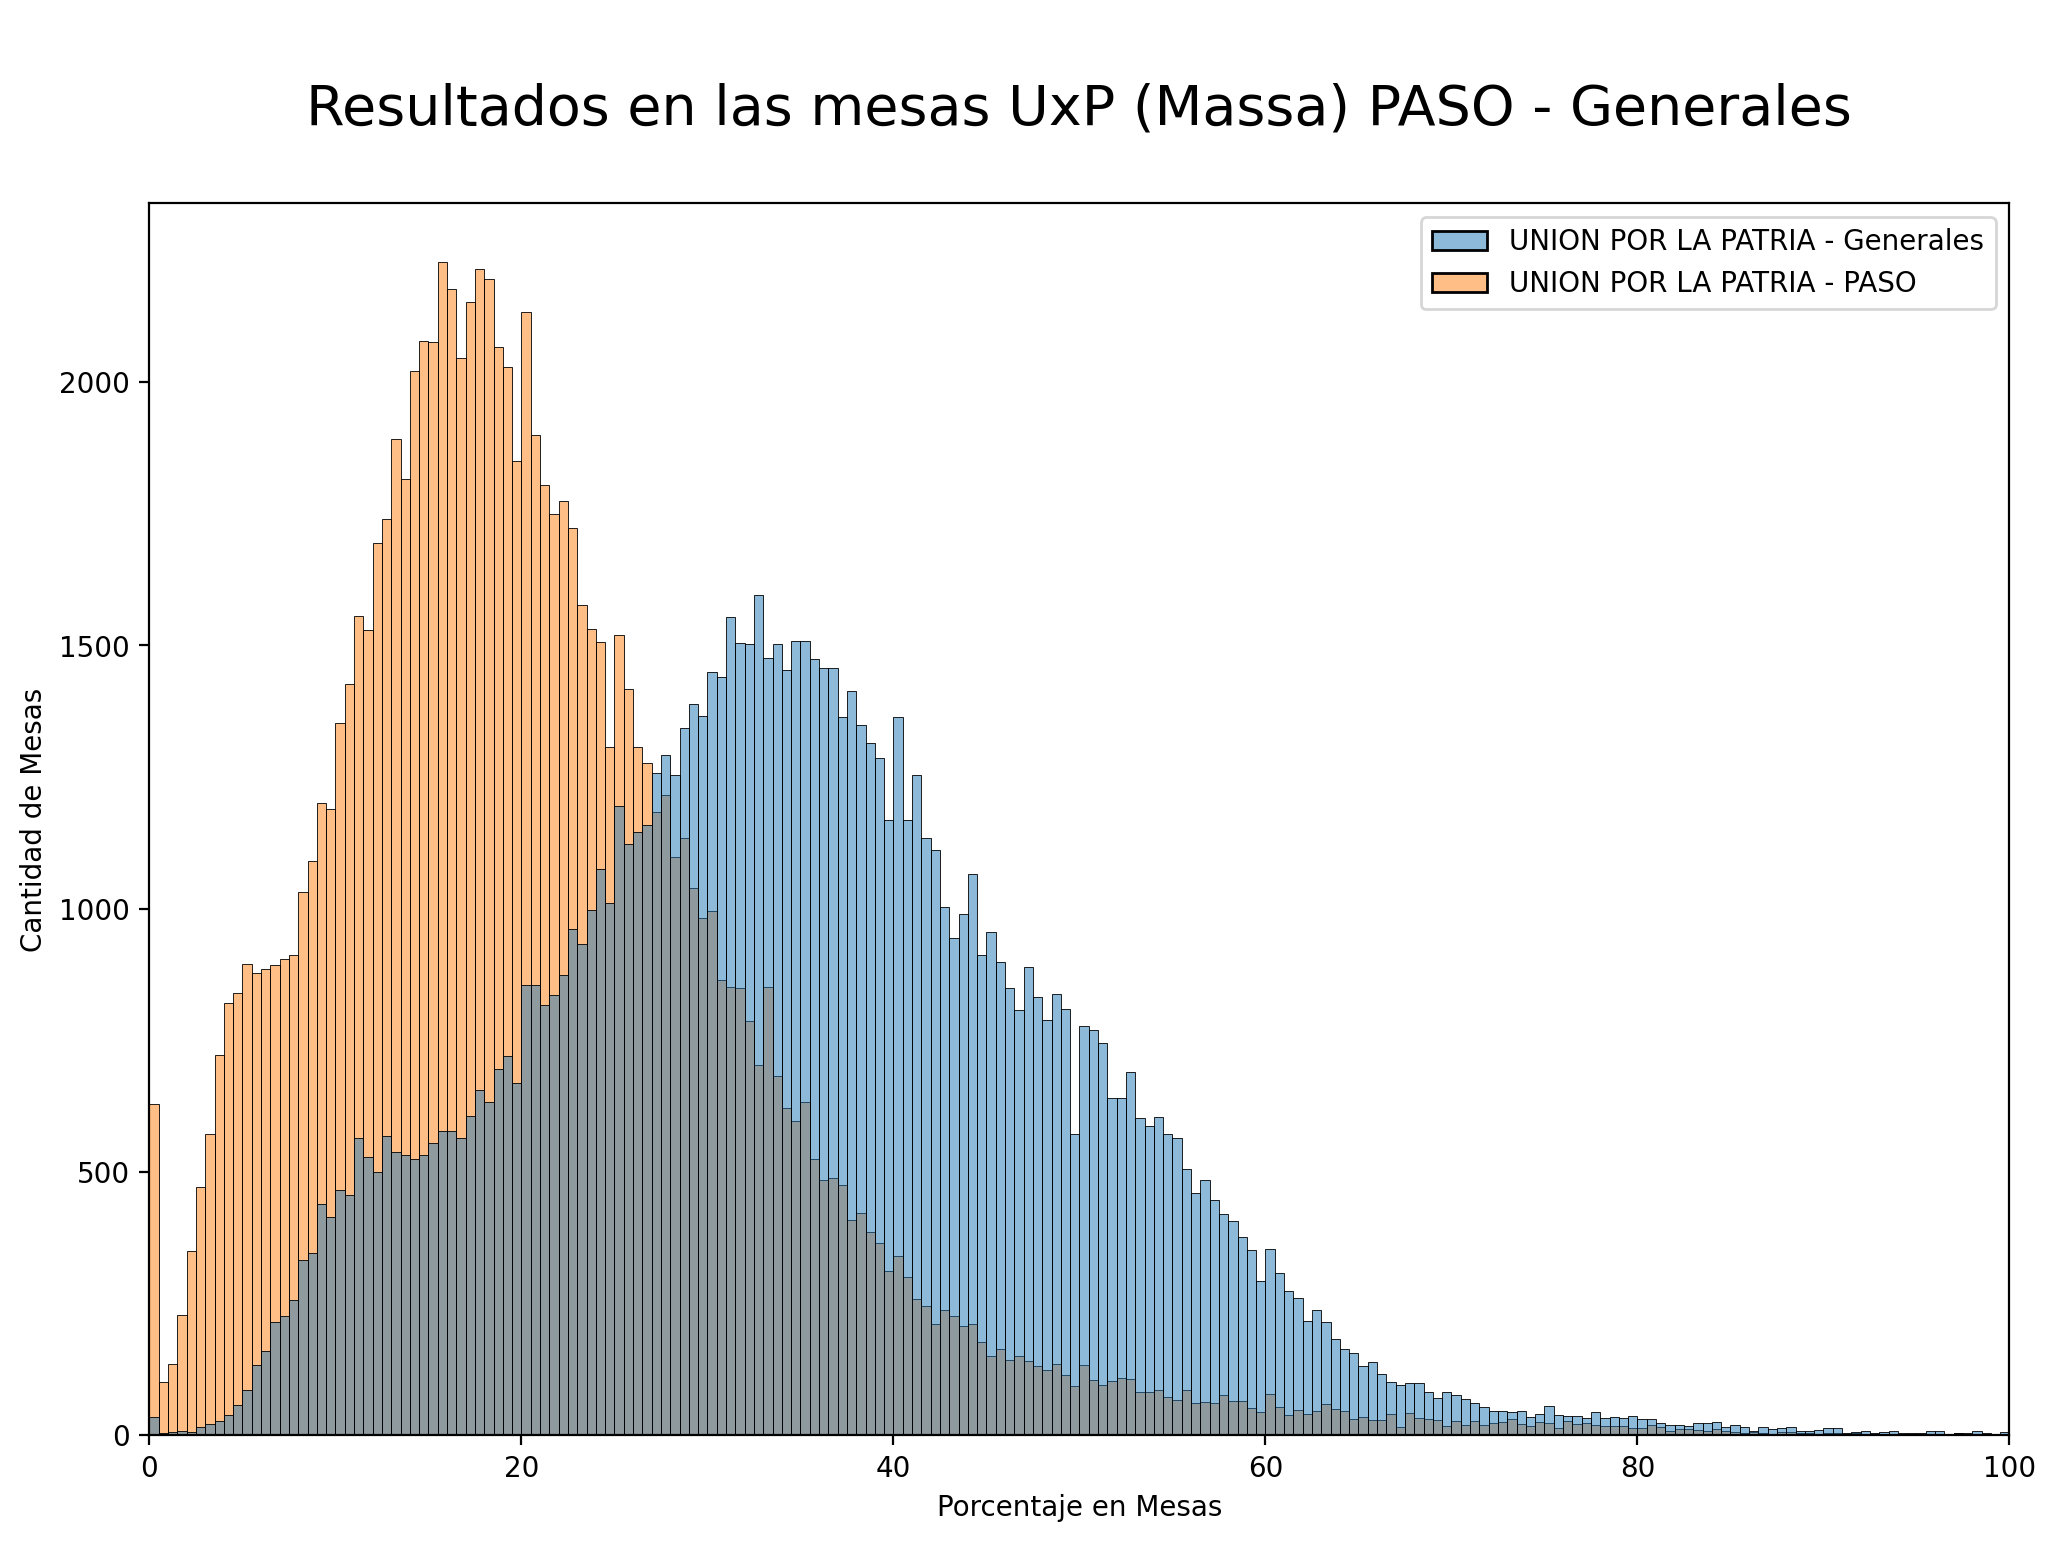

In [15]:
plt.figure(figsize=(12,8))
chart = sns.histplot(DISTRIBUTIONS_UXP, x="votos_porcentaje", bins=200, hue='agrupacion_nombre')
chart.set(xlim=(0, 100))
plt.title('\nResultados en las mesas UxP (Massa) PASO - Generales\n', fontsize=20)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
legend = plt.gca().get_legend()
legend.set_title('')
plt.show()

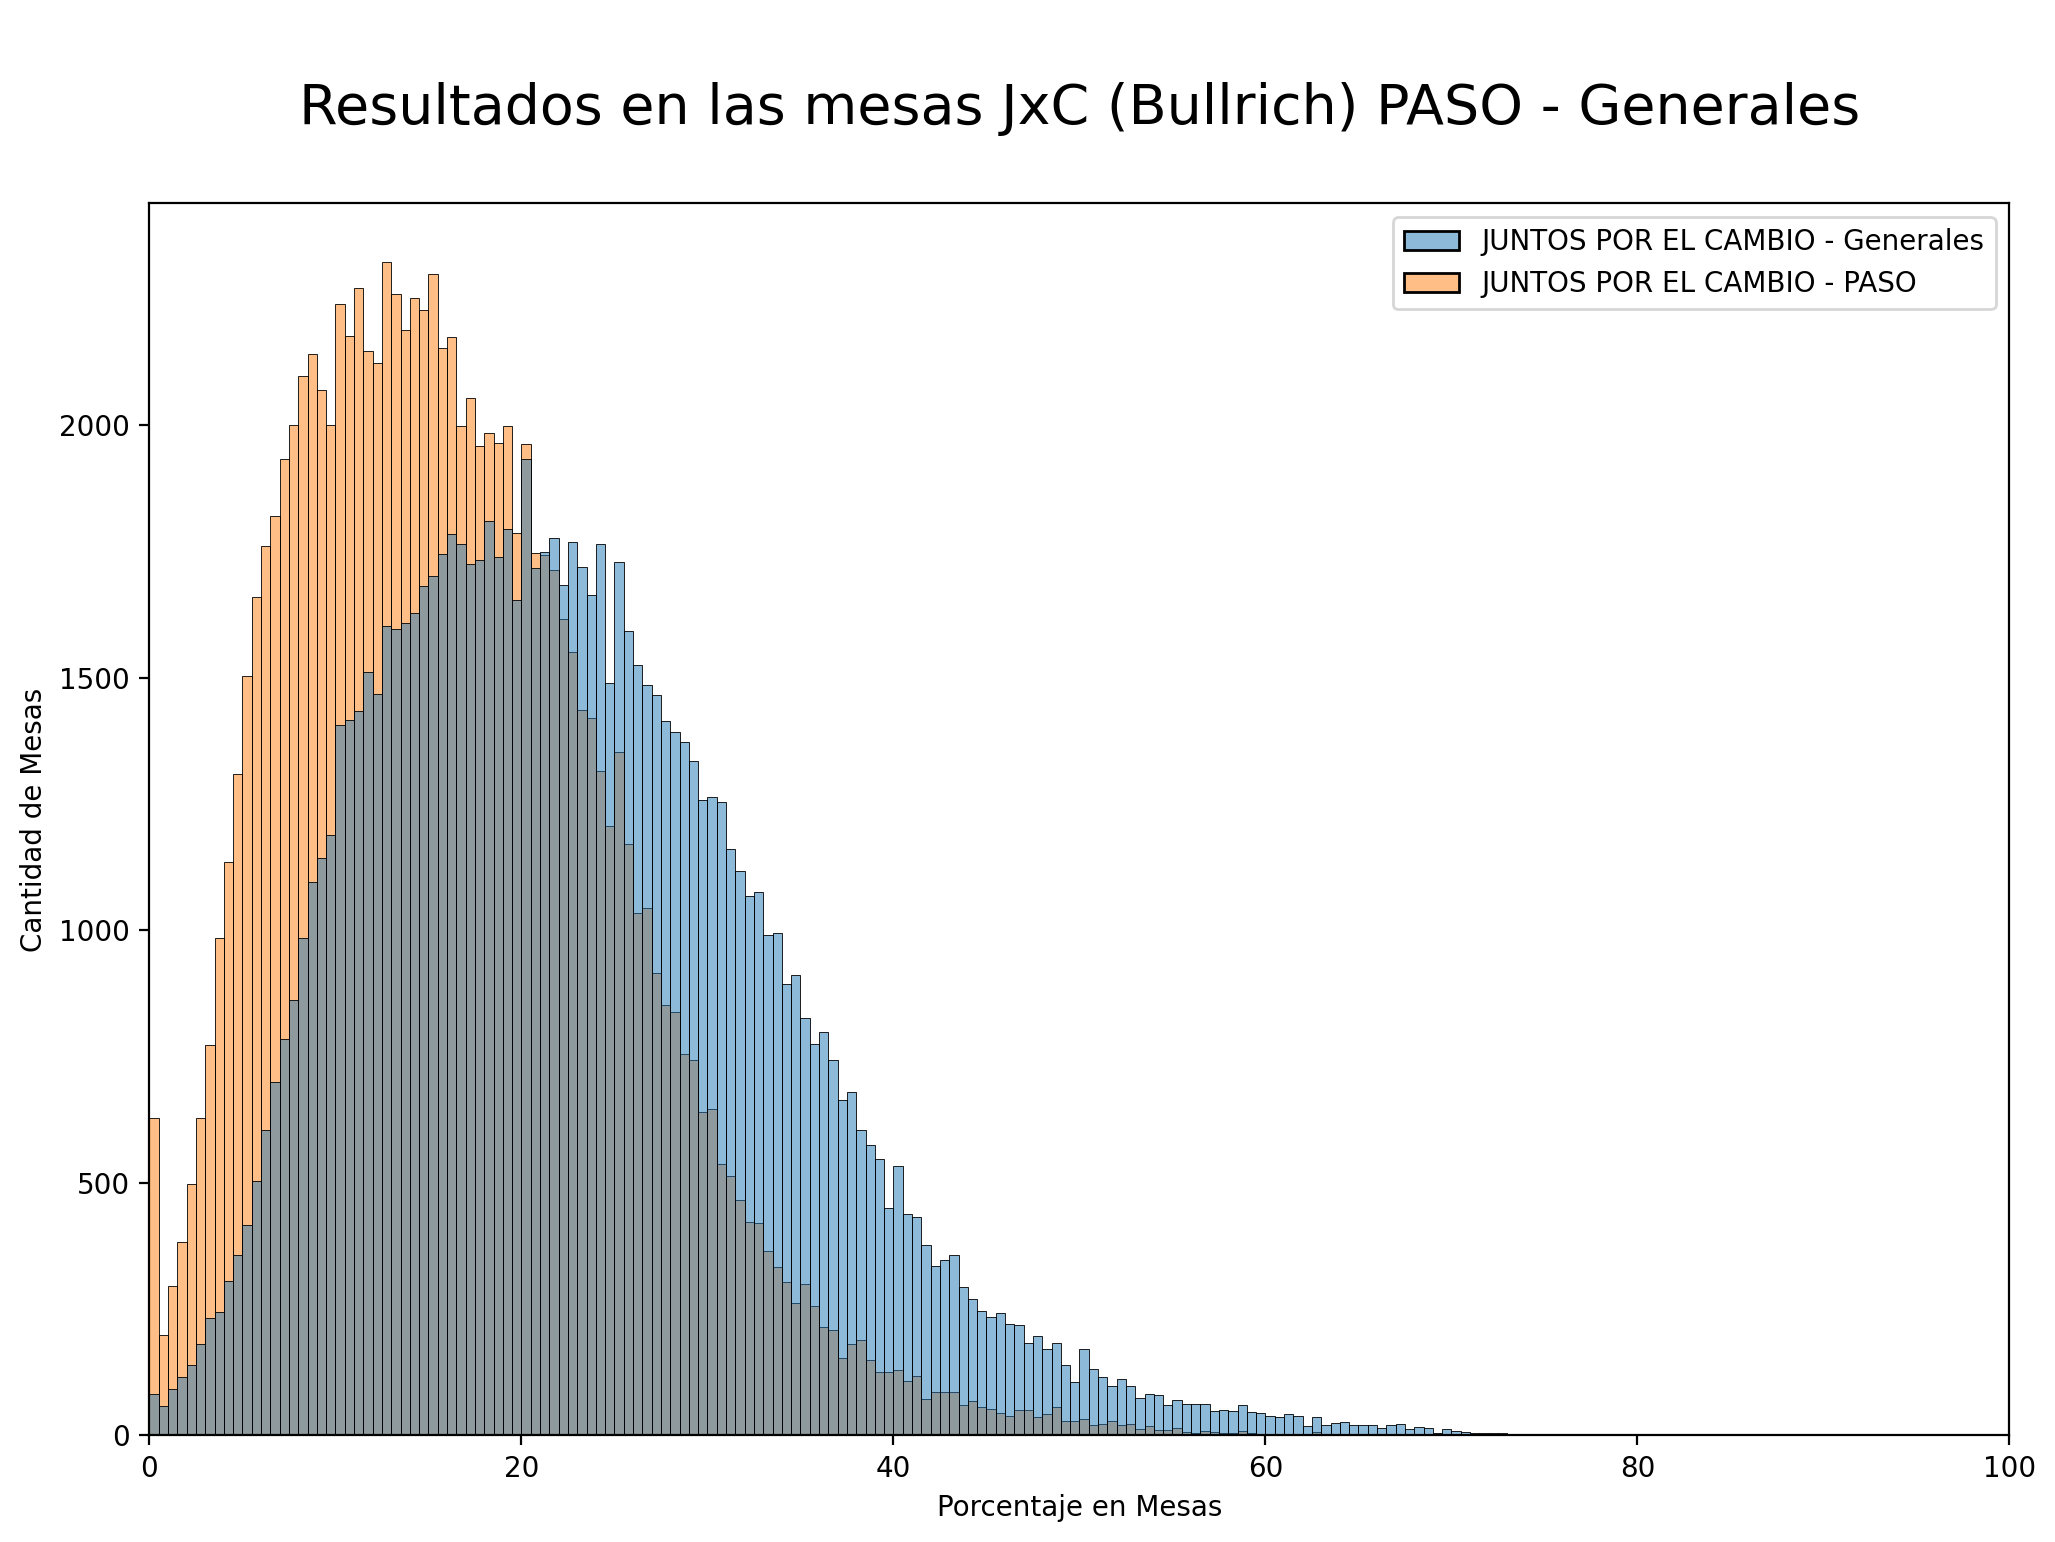

In [16]:
plt.figure(figsize=(12,8))
chart = sns.histplot(DISTRIBUTIONS_JXC, x="votos_porcentaje", bins=200, hue='agrupacion_nombre')
chart.set(xlim=(0, 100))

plt.title('\nResultados en las mesas JxC (Bullrich) PASO - Generales\n', fontsize=20)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
legend = plt.gca().get_legend()
legend.set_title('')
plt.show()

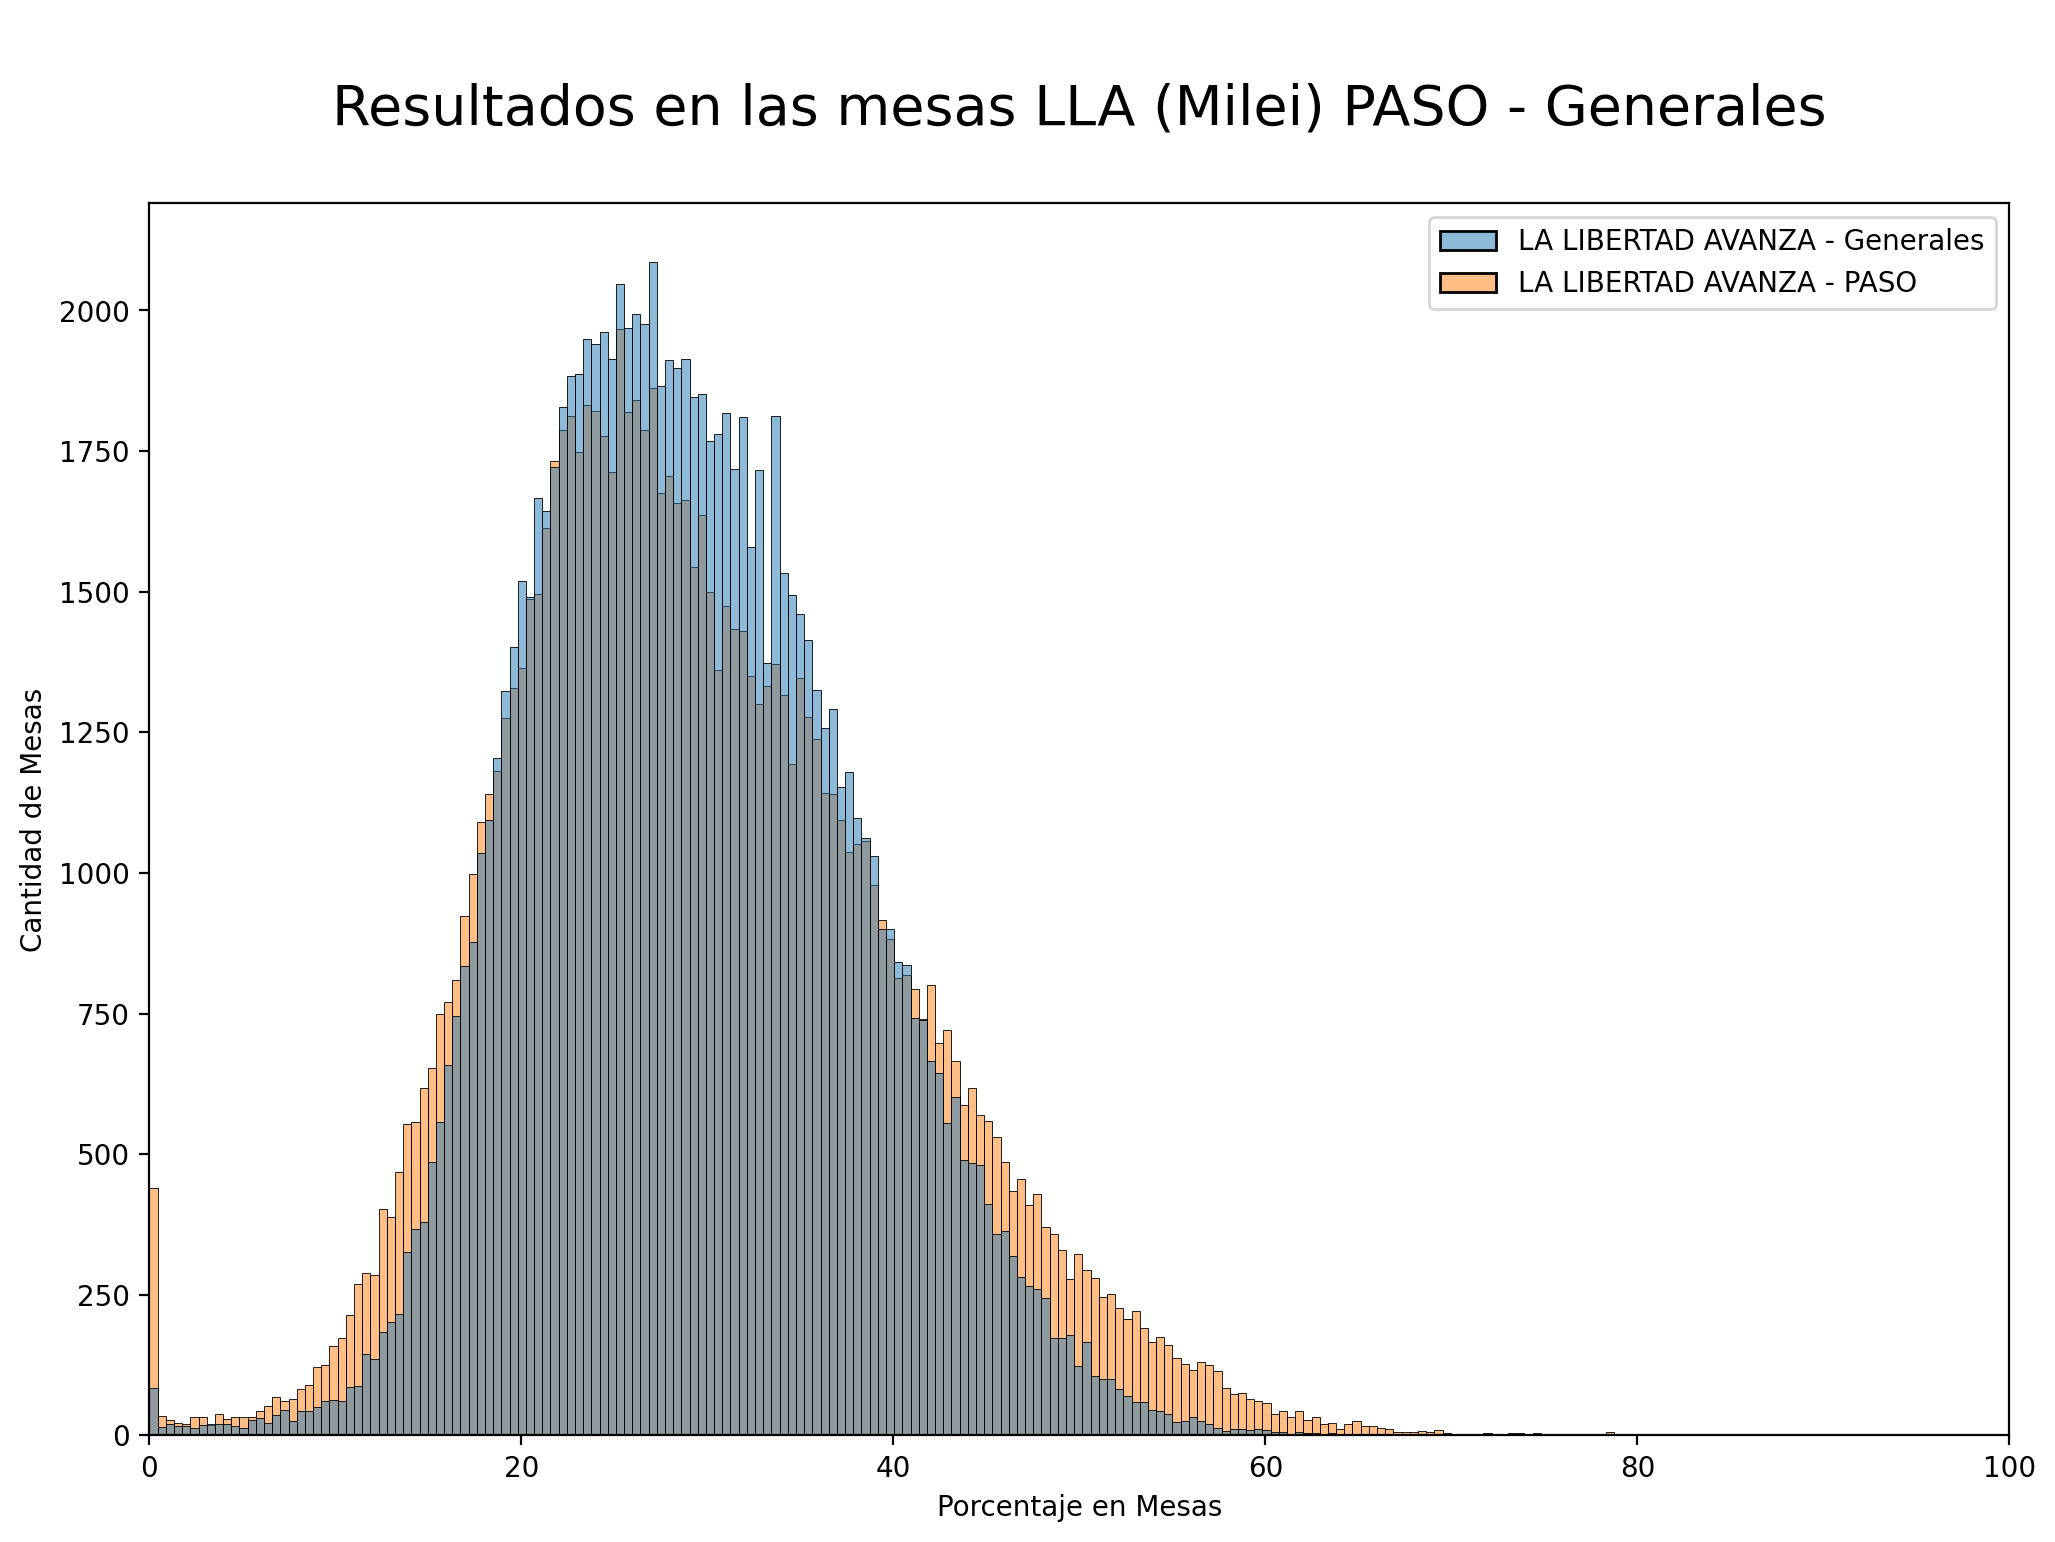

In [17]:
plt.figure(figsize=(12,8))
chart = sns.histplot(DISTRIBUTIONS_LLA, x="votos_porcentaje", bins=200, hue='agrupacion_nombre')
chart.set(xlim=(0, 100))

plt.title('\nResultados en las mesas LLA (Milei) PASO - Generales\n', fontsize=20)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
legend = plt.gca().get_legend()
legend.set_title('')
plt.show()

### Useful takaways

Let's find the tables that were not uploaded to the dataset:

In [18]:
MESAS_0 = PASO_PERCENTAGE_TOP_3.groupby('id_mesa')['votos_cantidad'].sum().reset_index()
MESAS_VOTOS = MESAS_0[MESAS_0['votos_cantidad']==0]
INDEX_MESAS_VOTOS = MESAS_VOTOS['id_mesa'].tolist()
PASO_MESAS_0_VOTOS = PASO_PERCENTAGE_TOP_3[PASO_PERCENTAGE_TOP_3['id_mesa'].isin(INDEX_MESAS_VOTOS)]
print('There are',len(PASO_MESAS_0_VOTOS['id_mesa']), 'tables that were not uploaded to the dataset')

There are 8790 tables that were not uploaded to the dataset


Let's find the tables were an agrupation did very well in the PASO Elections but underperformed drastically in the General Elections

In [19]:
PASO_PERCENTAGE_TOP_3 = PASO_PERCENTAGE[PASO_PERCENTAGE['agrupacion_nombre'].isin(['UNION POR LA PATRIA','JUNTOS POR EL CAMBIO','LA LIBERTAD AVANZA'])]
PASO_PERCENTAGE_TOP_3 = PASO_PERCENTAGE_TOP_3.drop('lista_nombre',axis=1).reset_index(drop=True)

In [20]:
GENERALES_PERCENTAGE_TOP_3 = GENERALES_PERCENTAGE[GENERALES_PERCENTAGE['agrupacion_nombre'].isin(['UNION POR LA PATRIA','JUNTOS POR EL CAMBIO','LA LIBERTAD AVANZA'])]

In [21]:
GENERALES_PERCENTAGE_TOP_3_reduced = GENERALES_PERCENTAGE_TOP_3[['id_mesa','agrupacion_nombre','votos_cantidad','votos_porcentaje']]
GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['UNION POR LA PATRIA'], 'UNION POR LA PATRIA - Generales')
GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['JUNTOS POR EL CAMBIO'], 'JUNTOS POR EL CAMBIO - Generales')
GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['LA LIBERTAD AVANZA'], 'LA LIBERTAD AVANZA - Generales')

C:\Users\Marcos\AppData\Local\Temp\ipykernel_16700\2695215019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['UNION POR LA PATRIA'], 'UNION POR LA PATRIA - Generales')
C:\Users\Marcos\AppData\Local\Temp\ipykernel_16700\2695215019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupaci

In [22]:
PASO_PERCENTAGE_TOP_3_reduced = PASO_PERCENTAGE_TOP_3[['id_mesa','agrupacion_nombre','votos_cantidad','votos_porcentaje']]
PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['UNION POR LA PATRIA'], 'UNION POR LA PATRIA - PASO')
PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['JUNTOS POR EL CAMBIO'], 'JUNTOS POR EL CAMBIO - PASO')
PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['LA LIBERTAD AVANZA'], 'LA LIBERTAD AVANZA - PASO')
PASO_PERCENTAGE_TOP_3_reduced = PASO_PERCENTAGE_TOP_3_reduced.groupby(['id_mesa','agrupacion_nombre'])['votos_cantidad','votos_porcentaje'].sum().reset_index()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_16700\178675963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['UNION POR LA PATRIA'], 'UNION POR LA PATRIA - PASO')
C:\Users\Marcos\AppData\Local\Temp\ipykernel_16700\178675963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['JUNTO

In [23]:
PASO_PERCENTAGE_TOP_3 = PASO_PERCENTAGE_TOP_3.groupby(['id_mesa','agrupacion_nombre'])['votos_cantidad','votos_porcentaje'].sum().reset_index()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_16700\2247523938.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  PASO_PERCENTAGE_TOP_3 = PASO_PERCENTAGE_TOP_3.groupby(['id_mesa','agrupacion_nombre'])['votos_cantidad','votos_porcentaje'].sum().reset_index()


In [24]:
GENERALES_PERCENTAGE_TOP_3_depurated = GENERALES_PERCENTAGE_TOP_3[['id_mesa','agrupacion_nombre','votos_cantidad','votos_porcentaje']]
PASO_PERCENTAGE_TOP_3_depurated = PASO_PERCENTAGE_TOP_3[['id_mesa','agrupacion_nombre','votos_cantidad','votos_porcentaje']]
MESAS_PORCENTAJE = GENERALES_PERCENTAGE_TOP_3_depurated.merge(PASO_PERCENTAGE_TOP_3_depurated, on=['id_mesa', 'agrupacion_nombre'], how='left')

In [25]:
MESAS_PORCENTAJE = MESAS_PORCENTAJE.rename(columns={'votos_cantidad_x':'n_generales','votos_porcentaje_x':'%_generales','votos_cantidad_y':'n_paso','votos_porcentaje_y':'%_paso',})
MESAS_PORCENTAJE = MESAS_PORCENTAJE[['id_mesa','agrupacion_nombre','n_generales','n_paso','%_generales','%_paso']]

In [26]:
MESAS_PORCENTAJE.head()

,id_mesa,agrupacion_nombre,n_generales,n_paso,%_generales,%_paso
0,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,UNION POR LA PATRIA,96,74.0,41.20,33.63
1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,JUNTOS POR EL CAMBIO,65,73.0,27.90,33.18
2,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,LA LIBERTAD AVANZA,44,40.0,18.88,18.18
3,Ciudad Autónoma de Buenos Aires/Comuna 01/0000...,UNION POR LA PATRIA,98,66.0,41.18,32.03
4,Ciudad Autónoma de Buenos Aires/Comuna 01/0000...,JUNTOS POR EL CAMBIO,86,86.0,36.13,41.75


Having merged both datasets, now let's see those tables were the agrupations, in comparison to the PASO Elections results, got much more votes.

In [42]:
MESAS_PORCENTAJE_GANADOR_values = MESAS_PORCENTAJE[(MESAS_PORCENTAJE['n_generales'] >= 20*MESAS_PORCENTAJE['n_paso']) & (MESAS_PORCENTAJE['n_generales']!=0) & (MESAS_PORCENTAJE['n_paso']>=10)]
MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_paso'],ascending=False)

,id_mesa,agrupacion_nombre,n_generales,n_paso,%_generales,%_paso
298437,Santiago del Estero/Moreno/00136/1746,UNION POR LA PATRIA,240,12.0,89.22,19.67


There is 1 table where UNION POR LA PATRIA multiply its votes by 20 in comparison with the ones it got in the PASO Elections.

In [43]:
MESAS_PORCENTAJE_GANADOR_values = MESAS_PORCENTAJE[(MESAS_PORCENTAJE['n_generales'] >= 15*MESAS_PORCENTAJE['n_paso']) & (MESAS_PORCENTAJE['n_generales']!=0) & (MESAS_PORCENTAJE['n_paso']>=10)]
MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_paso'],ascending=False)

,id_mesa,agrupacion_nombre,n_generales,n_paso,%_generales,%_paso
299625,Santiago del Estero/Río Hondo/00192/2147,UNION POR LA PATRIA,218,13.0,94.78,48.14
298437,Santiago del Estero/Moreno/00136/1746,UNION POR LA PATRIA,240,12.0,89.22,19.67
300621,Tucumán/Burruyacú/00196/3206,UNION POR LA PATRIA,194,12.0,71.59,60.00
252393,Salta/General José de San Martín/0043E/3516,UNION POR LA PATRIA,173,11.0,73.31,5.53
295401,Santiago del Estero/Capital/00017/739,UNION POR LA PATRIA,185,10.0,64.91,8.78
299664,Santiago del Estero/Río Hondo/00193/2160,UNION POR LA PATRIA,175,10.0,63.87,9.44


There are 6 tables where UNION POR LA PATRIA multiply its votes by 15 or more in comparison with the ones it got in the PASO Elections.

In [45]:
MESAS_PORCENTAJE_GANADOR_values = MESAS_PORCENTAJE[(MESAS_PORCENTAJE['n_generales'] >= 10*MESAS_PORCENTAJE['n_paso']) & (MESAS_PORCENTAJE['n_generales']!=0) & (MESAS_PORCENTAJE['n_paso']>=10)]
# MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_paso'],ascending=False)
print(MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_generales'],ascending=False).shape)
MESAS_PORCENTAJE_GANADOR_values.value_counts(['agrupacion_nombre'])

(37, 6)


agrupacion_nombre  
UNION POR LA PATRIA    32
LA LIBERTAD AVANZA      5
dtype: int64

There are 35 tables where UNION POR LA PATRIA multiply its votes by 10 or more in comparison with the ones it got in the PASO Elections, while LA LIBERTAD AVANZA only 5.

In [46]:
MESAS_PORCENTAJE_GANADOR_values = MESAS_PORCENTAJE[(MESAS_PORCENTAJE['n_generales'] >= 5*MESAS_PORCENTAJE['n_paso']) & (MESAS_PORCENTAJE['n_generales']!=0) & (MESAS_PORCENTAJE['n_paso']>=10)]
print(MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_generales'],ascending=False).shape)
MESAS_PORCENTAJE_GANADOR_values.value_counts(['agrupacion_nombre'])

(263, 6)


agrupacion_nombre   
UNION POR LA PATRIA     187
LA LIBERTAD AVANZA       64
JUNTOS POR EL CAMBIO     12
dtype: int64

There are 187 tables where UNION POR LA PATRIA multiply its votes by 5 or more in comparison with the ones it got in the PASO Elections, while LA LIBERTAD AVANZA only 64 and JUNTOS POR EL CAMBIO 12.

<hr>

Let's now analyze tables were it lost a drastical number of votes in comparison with the results it got from the PASO Elections

In [51]:
MESAS_PORCENTAJE_GANADOR_values = MESAS_PORCENTAJE[(MESAS_PORCENTAJE['n_generales'] <= 0.1*MESAS_PORCENTAJE['n_paso']) & (MESAS_PORCENTAJE['n_generales']>=1) & (MESAS_PORCENTAJE['n_paso']>=10)]
print(MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_generales'],ascending=False).shape)
# MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_paso'],ascending=False)
MESAS_PORCENTAJE_GANADOR_values.value_counts('agrupacion_nombre')

(104, 6)


agrupacion_nombre
LA LIBERTAD AVANZA      57
JUNTOS POR EL CAMBIO    28
UNION POR LA PATRIA     19
dtype: int64

In the General Elections, there were 57 tables where LA LIBERTAD AVANZA lost more than 90% of the votes that it got in the PASO, 28 in the case of JUNTOS POR EL CAMBIO and 19 UNION POR LA PATRIA

In [52]:
MESAS_PORCENTAJE_GANADOR_values = MESAS_PORCENTAJE[(MESAS_PORCENTAJE['n_generales'] <= 0.2*MESAS_PORCENTAJE['n_paso']) & (MESAS_PORCENTAJE['n_generales']>=1) & (MESAS_PORCENTAJE['n_paso']>=10)]
print(MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_generales'],ascending=False).shape)
# MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_paso'],ascending=False)
MESAS_PORCENTAJE_GANADOR_values.value_counts('agrupacion_nombre')

(237, 6)


agrupacion_nombre
LA LIBERTAD AVANZA      100
JUNTOS POR EL CAMBIO     75
UNION POR LA PATRIA      62
dtype: int64

In the General Elections, there were 100 tables where LA LIBERTAD AVANZA lost more than 80% of the votes that it got in the PASO, 75 in the case of JUNTOS POR EL CAMBIO and 62 UNION POR LA PATRIA

In [53]:
MESAS_PORCENTAJE_GANADOR_values = MESAS_PORCENTAJE[(MESAS_PORCENTAJE['n_generales'] <= 0.3*MESAS_PORCENTAJE['n_paso']) & (MESAS_PORCENTAJE['n_generales']>=1) & (MESAS_PORCENTAJE['n_paso']>=10)]
print(MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_generales'],ascending=False).shape)
# MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_paso'],ascending=False)
MESAS_PORCENTAJE_GANADOR_values.value_counts('agrupacion_nombre')

(386, 6)


agrupacion_nombre
JUNTOS POR EL CAMBIO    181
LA LIBERTAD AVANZA      123
UNION POR LA PATRIA      82
dtype: int64

In the General Elections, there were 123 tables where LA LIBERTAD AVANZA lost more than 70% of the votes that it got in the PASO, 181 in the case of JUNTOS POR EL CAMBIO and 82 UNION POR LA PATRIA